In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from scipy.integrate import odeint

# Construction of an Engine

Basic data from the technical characteristics of the engine:

##### Engine designation:
- Automotive
##### Engine type:
- Petrol
##### Engine speed: 
- four-stroke
##### Number of cylinders:
- 4
##### Cylinder layout:
- In-line
##### Type of cooling:
- liquid
##### Mixing mode:
- with carburetor
##### Compressor:
- No
##### Fuel:
- Gasoline
##### Effective power
- Ne,[kW]= 65
##### Rated speed
- n,[min-1]= 6200
##### Compression ratio
- ε= 9.5
##### Air ratio coefficient
- α= 0.95
##### Degree of preheating of working body
- ΔT= 10°
##### Completeness factor of the indicator diagram
- φn= 0.96
##### Ratio
- S/D= 0.9
##### Piston diameter
- D= 0.07 m
##### Filling loss coefficient
- ξ= 2.5
##### Fresh working substance velocity
- Wsk= 90 m/s
##### Residual gas temperature
- Tr,[K]= 900K
##### Residual gas pressure
- Pr,[MPa]= 0.110
##### Heat Utilisation Coefficient
- ξz= 0.900



## Parameters of working substance

##### 1. Theoretical amount of air to burn 1 kg of fuel :
$$ L_0= (gc/12 + g_H/4 + g_o/32)=0.5120 kmol/kg $$
$$ l_0=μBL_0=14.8326  kg air/kg fuel $$
##### 2. Actual amount of air to burn 1 kg of liquid fuel L,[kmol.unit./kg.max.]
$$ L=αL_0= 0.4864 kmol/kg $$
$$ L=μ_BL=14.091 kg air/kg fuel $$
##### 3. Amount of fresh working substance Me,[kmol.гор.см./kg.гор.]
$$ М_е=L + l/μ_р=0.4951  kmol/kg $$
##### 4. Theoretical molar change factor
$$ μ_0=M_r/M_e=1.0665 $$
##### 5. Lower heat of combustion of fuel Qд,[J/kg]
$$ Q_д =(34.013g_c + 125.6g_H - 10.9g_o - 2.512(9g_H - g_w)) = (34.013 \cdot 0.855 + 125.6 \cdot 0.145 - 2.512(9 \cdot 0.145 + 0)) = 44 \cdot 10^{6} $$
##### 6. The amount of heat lost due to incomplete combustion of the fuel:
$$ ΔQд=120*10^6(1-α)L0=3.0720*10^6 J/kg $$
Then: 
$$ Q_д=Q_д - ΔQд=40.928*10^6 J/kg $$
##### 7. Heat of combustion of the fuel-air mixture
$$ Qсм=(Q_д- ΔQ_д)/М_е=8,2667*10^7 J/kmol $$



# Filling process parameters

##### 1.Pressure at the end of the process
$$ Δp_a=p_0 – p_a=(β^2+ξск)(w^2_ск/2)*ρ_в*10^6= ξ*(w^2ск/2) ρ_в*10^6, МРа $$
$$ ρ_в - плътност на въздуха $$
$$ ρ_в=(p_0*10^6/RT_0)=(0.1*10^6/287*293)=1.19 kg/m^3 $$
$$ R=287 J/kgK – газова константа $$
$$ Δp_a=3*(100^2/2)*1.19*10^6=0.012 MPa $$
$$ p_a=p_0- Δp_a=0.1 – 0.18=0.088 MPa $$
The resulting pressure is within the range within which it varies for four-stroke petrol engines without supercharging: pa=(0.075...0.090) MPa.

##### 2.Residual gas coefficient
$$ γ_r=((T_0 + ΔT)/T_r)*(p_r/(εp_a – p_r))=0.0527 $$ Следователно получените стойности за γ_r са показател за добро очистване на цилиндъра.
##### 3. Temperature of working body at the end of filling process
$$ T_a= (T_0 + ΔT + γ_rT_r)/(1 + γ_r)= 342.3977 K $$ The resulting Ta is within the limits.
##### 4.Filling coefficient
$$ η_v=(ε/(ε-1))*(p_a/p_0)*(T_0/(T_0 + ΔT + γ_rT_r))= 0.7991 $$ 
 For carburettor engines: $$ η_v=0.75....0.85 $$


# Compression process parameters

##### 1.Pressure at the end of the thickening process
$$ P_c=p_a ε^{n1}=1.8557 $$
The resulting value is within the permissible range (0.9...2.0) for carburettor engines.
##### 2.Temperature at the end of the thickening process
$$ Т_с=Т_а ε^{n1-1}=760.3916 K $$
For carburettor engines $$ T_c=500...8000 K $$
The value obtained for Tc is real since ε and n1 have values towards the upper limit.


# Burning process parameters

##### 1.The actual molar shift factor
 $$ М_д=(M_г + М_r)/(M_e +M_r)=(μ_0 + γ_r)/(1 + γ_r)= 1.0631 $$
##### 2.Maximum combustion temperature
We use the equation
$$ (ξ_z(Q_д – ΔQ_д))/((1 + γ_z)M_e)) + (u_c + γ_ru’’_c)/(1+ γ_r)= μ_дu’’_z $$
The internal energy of the working rod in t. c is 
$$ U_c=( μc_v)*t_c=( μ c_v)_c(T_c-237) $$
Then $$ u_c=10663 kJ/kg $$
##### 3.Composition and quantity of gases contained in the exhaust gases
##### Carbon monoxide 
$$ M_{co}=2*((1-α)/(1 + k))*0.21*L_0=0.0138 kmol/kg $$   $$ M_{co}=0.0138 kmol/kg $$

##### Carbon dioxide 
$$ M_{co2}=((c/12))*2*((1-α)/(1 + k))*0.21L_0=0.1212 kmol/kg $$  $$ M_{co2}=0.1212 kmol/kg $$  

##### Steam
$$ M_{H2O}=H/2 – 2k*((1-α)/(1 + K))*0.21*L_0=0.1307 kmol/kg $$  $$ M_{H2O}=0.1307 kmol/kg $$  

##### Hydrogen
$$ M_{H2}=2k*((1-α)/(1 + k))*0.21*L_0=0.0066kmol/kg $$ $$ M_{H2}=0.0066 kmol/kg $$  

##### Nitrogen
$$ M_{N2}=0.79*αL_0=0.7277 kmol/kg $$  $$ M_{N2}=0.7277 kmol/kg $$  

#### 4.Maximum combustion temperature
$$ 2200°C<t_z<2300°C $$
$$ t_z= t_{z1} + (t_{z2} - t_{z1})*((u’’z-u’’z_1)/(u’’z_2 –u’’z_1))= 2830 K $$ $$ t_z= 2830 °C $$
For carburettor engines $$ t_z= 2500...2900 K $$
#### 5.Maximum combustion pressure
$$ p_{z max} = μ_дp_c*(T_z/T_c)=7.3431 MPa $$
For carburettor engines $$ p_{z max}=3.5...6.0 MPa $$

#### 6.Actual maximum combustion pressure
$$ P_{zд}=0.85p_{r max}= 6.2416 МРа $$

#### 7.Degree of pressure riseo
$$ λ= p_{r max}/p_c=3.957 $$
For carburettor engines $$ λ=3...4 $$


# Extension process parameters

#### 1.Pressure at the end of the extension
$$ P_b= p_{r max}/ε^{n2}=0.4338 MPa $$ $$ p_b=0.35…0.5 MPa $$

#### 2.Temperature at extension end
$$ T_b=T_z/ε^{n1}-1=1588 K $$  $$ T_b=1500…1700 K $$

#### 3.Checking exhaust gas temperatures
$$ T^{*}_{r}=T_b/ =1023 K $$
$$ T_r= T^{*}_{r}-T_r=1023-1052=29°=2.9 % $$
Error could be aprox. ~2.9% , reliability indicator


# Engine Indicators

$$ p_i’=(p_c/(ε-1))*[(λ/(n_2- 1))*(1-1/(ε_{n2}-1))-1/(n_1-1)(1-1/(ε_{n1}-1))]= 1.1387 MPa $$ 
$$ p_i’=1.1387 MPa $$


#### 2.Actual average indicator pressure
$$ P_i=φ_п p_i’=1.0932 MPa $$
For four-stroke petrol engines $$ p_i=(0,8..1,2)Mpa $$

#### 3.Engine efficiency indicator
$$ η_i=(pil_0α)/(Q_дη_vρ)= 0.3589 $$ For petrol engines $$ η=(0,28..0,40)$$

#### 4.Indicative specific fuel consumption
$$ g_i=3.6/(Q_дη_i)= 227.9686 g/kWh $$ For carburettor engines $$ g_i=(245..300)g/kWh $$


# Effective indicators

#### 1. Average piston speed
$ c_m=(Sn)/20=13.02 m/s $

For carburettor engines for passenger cars

$ C_m=(12..15)m/s $

#### 2.Average mechanical loss pressure
$$ p_3=a + bc_m=0.2258 MPa $$

#### 3.Medium effective pressureе
$$ p_e=p_i-p_з=0.8674 MPa $$ 
For petrol engineи $$ p_e=(0,7..1,2)Mpa $$

#### 4.Mechanical motor efficiency
$$ η_M=1- p_з/ p_i=7935 $$
For four-stroke carburettor engines $$ η=(0,79..0,88)$$

#### 5.Effective motor efficiency
$$ η_e= η_i η_M=0.2848 $$
For petrol engines $$ η=(0,25..0,29)$$

#### 6.Effective special fuel consumption
$$ g_e=3.6/(Q_д η_e)= 287.3035 g/kWh $$
For petrol engines $$ g_e=(290..320)g/kWh $$


# Check the main dimensions of the motor

Since the thermal calculation is for a real engine and known dimensions, the purpose of the verification is to find out whether the engine parameters obtained from the calculation correspond to the real ones.

#### 1.Gross engine displacement
$$ V_p=30r(N_e/(p_en))= 1.4503 dm3 $$ 

#### 2.Cylinder stroke volume
$$ V=V_p/i=0.3626 dm3 $$

#### 3.Cylinder diameter and piston stroke
$$ D=100 \sqrt[3](4V_h)/(\eth æ) = 80 mm $$ приемаме $$ æ=1 $$ и ход на буталото $$ S= 72 mm $$

#### 4.Received workload:
$ 1.4476 dm3 $

#### 5.The effective engine power
$$ N_e=(p_eV_pn)/(30r)= 65kW $$

#### 6.Torque 
$$ М_д=9550N_e/n= 100,121 Nm $$

#### 7.Litre capacity
$$ N_л=N_e/V_p= 44.82 kW/dm3 $$ 
##### For petrol engines $$ N_л=(30..50)kW/dm3 $$

#### 8.Piston power
$$ N_б=N_e/(F_{\delta_i})=N_лS=32.27 kW/dm3 $$
##### For petrol engines $$ N_б=(11..48)kW/dm3 $$

#### 9.Hourly fuel consumption
$$ G_r=N_eG_e=18.67 kg/h $$

#### 10.Hourly air consumption
$$ G_B=G_r\alpha l_0=263.146 kg/h $$


## Motor speed characteristic

#### 1.Adjustment factor
$$ k=M_{g max}/M_{gн}=1.250$$  
##### For petrol engines k=(1,25..1,35)


## Engine heat balance

#### 1. Available heat quantity
$$ Q_1=G_rQ_g= 228250 J/s$$

#### 2.Heat equivalent to efficient operation
$$ Q_e=1000N_e= 65000 J/s $$

#### 3. Heat transferred to the cooling medium
$$ Q_{охл}=ciD^{1+2m}n^m(Q_q – \Delta Q_g)/(\alpha Q_g) =35818 J/s $$
where c=0.5

#### 4. Heat carried away with exhaust gases
$$ Q_{ог}=G_s(M_rc_p’T_r-M_ec_pT_0)= 69577 J/s $$

#### 5. Heat from chemical incompleteness in combustion
$$ Q_{хиг}=G_s \Delta Q=15936 J/s$$

#### 6. Residual member
$$ Q_{ост}=Q_1-(Q_e + Q_{хиг} + Q_{ог} + Q_{охл})=41915 J/s $$

#### 7. Relative values of heat balance components
$$ q_e=Q_e/Q_1= 28.48% $$ $$q_e=(22..29)% $$
$$ q_{oхл}=Q_{охл}/Q_1= 15.69% $$ $$q_{охл}=(15..30)% $$
$$ q_{ог}=Q_{ог}/Q_1= 30.48% $$ $$ q_{ог}=(30..35)% $$
$$ q_{хиг}=Q_{хиг}/Q_1= 6.98%$$ $$ q_{хиг}=(0..30)% $$
$$ q_{ост}=Q_{ост}/Q_1=18.36% $$ $$ q_ост=(3..9)% $$


## Construction of external speed characteristic

#### The data are presented in Table1

Interval of engine crankshaft speed variation. 
Assume:

$ n = 900 min $

$ n = 6200 min $

The speed interval is assumed to be 100 min 

Calculate the points on the power curve.


##### for petrol engines 


$$ N_{вх} = N_e\frac{n_x}{n_N} \left[ \begin{array}{cc|r}
 1+\frac{n_x}{n_N}-\left( \begin{array}{c}\frac{n_x}{n_N}\end{array} \right) \end{array}\right] ,kW
 $$

Calculation of points on the torque curve

$$ M_вх=9550.\frac{N_ех}{n_N} $$

$$ M_{ex}=9550.\frac{N_{ex}}{n_N},N.m $$

Calculation of mean effective pressure curve points

$$ P_{ex} =\frac{N_{ex}.30.\tau}{V_pn_x}, MPa$$ 

Calculating the points on the specific fuel consumption curve 

 -for petrol engines

$$ g_{ex} = g_{eN}\left[ \begin{array}
11.2-\frac{n_x}{n_N} + 0.8 * \left( \begin{array}{c}\frac{n_x}{n_N}\end{array} \right) \end{array}\right] ,kg/kW.h
 $$

Calculate the points on the hourly fuel consumption curve

$$ G_{hours} =g_{ex}* N{ex}* 10^{-3} $$ 

$$ Table 1 $$

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-dm3z{font-style:italic;font-weight:bold;text-align:left;text-decoration:underline;vertical-align:top}
.tg .tg-scrz{background-color:#ffffff;color:#000000;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg" style="undefined;table-layout: fixed; width: 386px">
<colgroup>
<col style="width: 100px">
<col style="width: 100px">
<col style="width: 100px">
<col style="width: 100px">
<col style="width: 100px">
<col style="width: 100px">
</colgroup>
<thead>
  <tr>
    <th class="tg-scrz">$n*10^{-3}$</th>
    <th class="tg-scrz">$N_{ex}$</th>
    <th class="tg-scrz">$M_{еx}$</th>
    <th class="tg-scrz">$P_{ex}$</th>
    <th class="tg-scrz">$g_{ex}$</th>
    <th class="tg-scrz">$G_{hours}$</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-dm3z">min-1</td>
    <td class="tg-dm3z">kw</td>
    <td class="tg-dm3z">Nm</td>
    <td class="tg-dm3z">MPa</td>
    <td class="tg-dm3z">g/KWh</td>
    <td class="tg-dm3z">kg/h</td>
  </tr>
  <tr>
    <td class="tg-0lax">0.5000</td>
    <td class="tg-0lax">5.6306</td>
    <td class="tg-0lax">107.5441</td>
    <td class="tg-0lax">1.1129</td>
    <td class="tg-0lax">323.0894</td>
    <td class="tg-0lax">1.8192</td>
  </tr>
  <tr>
    <td class="tg-0lax">0.6000</td>
    <td class="tg-0lax">6.8402</td>
    <td class="tg-0lax">108.8724</td>
    <td class="tg-0lax">1.1244</td>
    <td class="tg-0lax">319.1132</td>
    <td class="tg-0lax">2.1828</td>
  </tr>
  <tr>
    <td class="tg-0lax">0.7000</td>
    <td class="tg-0lax">8.0737</td>
    <td class="tg-0lax">110.1487</td>
    <td class="tg-0lax">1.1354</td>
    <td class="tg-0lax">315.2566</td>
    <td class="tg-0lax">2.5453</td>
  </tr>
  <tr>
    <td class="tg-0lax">0.8000</td>
    <td class="tg-0lax">9.3297</td>
    <td class="tg-0lax">111.3729</td>
    <td class="tg-0lax">1.1460</td>
    <td class="tg-0lax">311.5195</td>
    <td class="tg-0lax">2.9064</td>
  </tr>
  <tr>
    <td class="tg-0lax">0.9000</td>
    <td class="tg-0lax">10.6063</td>
    <td class="tg-0lax">112.5449</td>
    <td class="tg-0lax">1.1562</td>
    <td class="tg-0lax">307.9021</td>
    <td class="tg-0lax">3.2657</td>
  </tr>
  <tr>
    <td class="tg-0lax">1.0000</td>
    <td class="tg-0lax">11.9021</td>
    <td class="tg-0lax">113.6649</td>
    <td class="tg-0lax">1.1659</td>
    <td class="tg-0lax">304.4042</td>
    <td class="tg-0lax">3.6230</td>
  </tr>
  <tr>
    <td class="tg-0lax">1.1000</td>
    <td class="tg-0lax">13.2153</td>
    <td class="tg-0lax">114.7328</td>
    <td class="tg-0lax">1.1751</td>
    <td class="tg-0lax">301.0259</td>
    <td class="tg-0lax">3.9781</td>
  </tr>
  <tr>
    <td class="tg-0lax">1.2000</td>
    <td class="tg-0lax">14.5443</td>
    <td class="tg-0lax">115.7486</td>
    <td class="tg-0lax">1.1839</td>
    <td class="tg-0lax">297.7672</td>
    <td class="tg-0lax">4.3308</td>
  </tr>
  <tr>
    <td class="tg-0lax">1.3000</td>
    <td class="tg-0lax">15.8875</td>
    <td class="tg-0lax">116.7123</td>
    <td class="tg-0lax">1.1923</td>
    <td class="tg-0lax">294.6281</td>
    <td class="tg-0lax">4.6809</td>
  </tr>
  <tr>
    <td class="tg-0lax">1.4000</td>
    <td class="tg-0lax">17.2433</td>
    <td class="tg-0lax">117.6239</td>
    <td class="tg-0lax">1.2002</td>
    <td class="tg-0lax">291.6086</td>
    <td class="tg-0lax">5.0283</td>
  </tr>
  <tr>
    <td class="tg-0lax">1.5000</td>
    <td class="tg-0lax">18.6100</td>
    <td class="tg-0lax">118.4834</td>
    <td class="tg-0lax">1.2076</td>
    <td class="tg-0lax">288.7086</td>
    <td class="tg-0lax">5.3729</td>
  </tr>
  <tr>
    <td class="tg-0lax">1.6000</td>
    <td class="tg-0lax">19.9859</td>
    <td class="tg-0lax">119.2909</td>
    <td class="tg-0lax">1.2146</td>
    <td class="tg-0lax">285.9283</td>
    <td class="tg-0lax">5.7145</td>
  </tr>
  <tr>
    <td class="tg-0lax">1.7000</td>
    <td class="tg-0lax">21.3695</td>
    <td class="tg-0lax">120.0462</td>
    <td class="tg-0lax">1.2212</td>
    <td class="tg-0lax">283.2675</td>
    <td class="tg-0lax">6.0533</td>
  </tr>
  <tr>
    <td class="tg-0lax">1.8000</td>
    <td class="tg-0lax">22.7591</td>
    <td class="tg-0lax">120.7494</td>
    <td class="tg-0lax">1.2273</td>
    <td class="tg-0lax">280.7263</td>
    <td class="tg-0lax">6.3891</td>
  </tr>
  <tr>
    <td class="tg-0lax">1.9000</td>
    <td class="tg-0lax">24.1530</td>
    <td class="tg-0lax">121.4006</td>
    <td class="tg-0lax">1.2329</td>
    <td class="tg-0lax">278.3047</td>
    <td class="tg-0lax">6.7219</td>
  </tr>
  <tr>
    <td class="tg-0lax">2.0000</td>
    <td class="tg-0lax">25.5497</td>
    <td class="tg-0lax">121.9996</td>
    <td class="tg-0lax">1.2381</td>
    <td class="tg-0lax">276.0027</td>
    <td class="tg-0lax">7.0518</td>
  </tr>
  <tr>
    <td class="tg-0lax">2.1000</td>
    <td class="tg-0lax">26.9474</td>
    <td class="tg-0lax">122.5466</td>
    <td class="tg-0lax">1.2428</td>
    <td class="tg-0lax">273.8203</td>
    <td class="tg-0lax">7.3788</td>
  </tr>
  <tr>
    <td class="tg-0lax">2.2000</td>
    <td class="tg-0lax">28.3446</td>
    <td class="tg-0lax">123.0415</td>
    <td class="tg-0lax">1.2471</td>
    <td class="tg-0lax">271.7574</td>
    <td class="tg-0lax">7.7029</td>
  </tr>
  <tr>
    <td class="tg-0lax">2.3000</td>
    <td class="tg-0lax">29.7397</td>
    <td class="tg-0lax">123.4843</td>
    <td class="tg-0lax">1.2510</td>
    <td class="tg-0lax">269.8142</td>
    <td class="tg-0lax">8.0242</td>
  </tr>
  <tr>
    <td class="tg-0lax">2.4000</td>
    <td class="tg-0lax">31.1309</td>
    <td class="tg-0lax">123.8750</td>
    <td class="tg-0lax">1.2543</td>
    <td class="tg-0lax">267.9905</td>
    <td class="tg-0lax">8.3428</td>
  </tr>
  <tr>
    <td class="tg-0lax">2.5000</td>
    <td class="tg-0lax">32.5166</td>
    <td class="tg-0lax">124.2136</td>
    <td class="tg-0lax">1.2573</td>
    <td class="tg-0lax">266.2864</td>
    <td class="tg-0lax">8.6587</td>
  </tr>
  <tr>
    <td class="tg-0lax">2.6000</td>
    <td class="tg-0lax">33.8953</td>
    <td class="tg-0lax">124.5001</td>
    <td class="tg-0lax">1.2598</td>
    <td class="tg-0lax">264.7019</td>
    <td class="tg-0lax">8.9722</td>
  </tr>
  <tr>
    <td class="tg-0lax">2.7000</td>
    <td class="tg-0lax">35.2652</td>
    <td class="tg-0lax">124.7345</td>
    <td class="tg-0lax">1.2618</td>
    <td class="tg-0lax">263.2370</td>
    <td class="tg-0lax">9.2831</td>
  </tr>
  <tr>
    <td class="tg-0lax">2.8000</td>
    <td class="tg-0lax">36.6248</td>
    <td class="tg-0lax">124.9168</td>
    <td class="tg-0lax">1.2634</td>
    <td class="tg-0lax">261.8917</td>
    <td class="tg-0lax">9.5917</td>
  </tr>
  <tr>
    <td class="tg-0lax">2.9000</td>
    <td class="tg-0lax">37.9724</td>
    <td class="tg-0lax">125.0470</td>
    <td class="tg-0lax">1.2645</td>
    <td class="tg-0lax">260.6659</td>
    <td class="tg-0lax">9.8981</td>
  </tr>
  <tr>
    <td class="tg-0lax">3.0000</td>
    <td class="tg-0lax">39.3063</td>
    <td class="tg-0lax">125.1252</td>
    <td class="tg-0lax">1.2652</td>
    <td class="tg-0lax">259.5597</td>
    <td class="tg-0lax">10.2023</td>
  </tr>
  <tr>
    <td class="tg-0lax">3.1000</td>
    <td class="tg-0lax">40.6250</td>
    <td class="tg-0lax">125.1512</td>
    <td class="tg-0lax">1.2654</td>
    <td class="tg-0lax">258.5732</td>
    <td class="tg-0lax">10.5045</td>
  </tr>
  <tr>
    <td class="tg-0lax">3.2000</td>
    <td class="tg-0lax">41.9268</td>
    <td class="tg-0lax">125.1252</td>
    <td class="tg-0lax">1.2652</td>
    <td class="tg-0lax">257.7062</td>
    <td class="tg-0lax">10.8048</td>
  </tr>
  <tr>
    <td class="tg-0lax">3.3000</td>
    <td class="tg-0lax">43.2100</td>
    <td class="tg-0lax">125.0470</td>
    <td class="tg-0lax">1.2645</td>
    <td class="tg-0lax">256.9588</td>
    <td class="tg-0lax">11.1032</td>
  </tr>
  <tr>
    <td class="tg-0lax">3.4000</td>
    <td class="tg-0lax">44.4730</td>
    <td class="tg-0lax">124.9168</td>
    <td class="tg-0lax">1.2634</td>
    <td class="tg-0lax">256.3309</td>
    <td class="tg-0lax">11.3998</td>
  </tr>
  <tr>
    <td class="tg-0lax">3.5000</td>
    <td class="tg-0lax">45.7142</td>
    <td class="tg-0lax">124.7345</td>
    <td class="tg-0lax">1.2618</td>
    <td class="tg-0lax">255.8227</td>
    <td class="tg-0lax">11.6947</td>
  </tr>
  <tr>
    <td class="tg-0lax">3.6000</td>
    <td class="tg-0lax">46.9320</td>
    <td class="tg-0lax">124.5001</td>
    <td class="tg-0lax">1.2598</td>
    <td class="tg-0lax">255.4341</td>
    <td class="tg-0lax">11.9880</td>
  </tr>
  <tr>
    <td class="tg-0lax">3.7000</td>
    <td class="tg-0lax">48.1246</td>
    <td class="tg-0lax">124.2136</td>
    <td class="tg-0lax">1.2573</td>
    <td class="tg-0lax">255.1650</td>
    <td class="tg-0lax">12.2797</td>
  </tr>
  <tr>
    <td class="tg-0lax">3.8000</td>
    <td class="tg-0lax">49.2906</td>
    <td class="tg-0lax">123.8750</td>
    <td class="tg-0lax">1.2543</td>
    <td class="tg-0lax">255.0155</td>
    <td class="tg-0lax">12.5699</td>
  </tr>
  <tr>
    <td class="tg-0lax">3.9000</td>
    <td class="tg-0lax">50.4281</td>
    <td class="tg-0lax">123.4843</td>
    <td class="tg-0lax">1.2510</td>
    <td class="tg-0lax">254.9856</td>
    <td class="tg-0lax">12.8584</td>
  </tr>
  <tr>
    <td class="tg-0lax">4.0000</td>
    <td class="tg-0lax">51.5357</td>
    <td class="tg-0lax">123.0415</td>
    <td class="tg-0lax">1.2471</td>
    <td class="tg-0lax">255.0753</td>
    <td class="tg-0lax">13.1455</td>
  </tr>
  <tr>
    <td class="tg-0lax">4.1000</td>
    <td class="tg-0lax">52.6116</td>
    <td class="tg-0lax">122.5466</td>
    <td class="tg-0lax">1.2428</td>
    <td class="tg-0lax">255.2846</td>
    <td class="tg-0lax">13.4309</td>
  </tr>
  <tr>
    <td class="tg-0lax">4.2000</td>
    <td class="tg-0lax">53.6543</td>
    <td class="tg-0lax">121.9996</td>
    <td class="tg-0lax">1.2381</td>
    <td class="tg-0lax">255.6134</td>
    <td class="tg-0lax">13.7148</td>
  </tr>
  <tr>
    <td class="tg-0lax">4.3000</td>
    <td class="tg-0lax">54.6620</td>
    <td class="tg-0lax">121.4006</td>
    <td class="tg-0lax">1.2329</td>
    <td class="tg-0lax">256.0619</td>
    <td class="tg-0lax">13.9969</td>
  </tr>
  <tr>
    <td class="tg-0lax">4.4000</td>
    <td class="tg-0lax">55.6332</td>
    <td class="tg-0lax">120.7494</td>
    <td class="tg-0lax">1.2273</td>
    <td class="tg-0lax">256.6299</td>
    <td class="tg-0lax">14.2772</td>
  </tr>
  <tr>
    <td class="tg-0lax">4.5000</td>
    <td class="tg-0lax">56.5663</td>
    <td class="tg-0lax">120.0462</td>
    <td class="tg-0lax">1.2212</td>
    <td class="tg-0lax">257.3175</td>
    <td class="tg-0lax">14.5555</td>
  </tr>
  <tr>
    <td class="tg-0lax">4.6000</td>
    <td class="tg-0lax">57.4595</td>
    <td class="tg-0lax">119.2909</td>
    <td class="tg-0lax">1.2146</td>
    <td class="tg-0lax">258.1247</td>
    <td class="tg-0lax">14.8317</td>
  </tr>
  <tr>
    <td class="tg-0lax">4.7000</td>
    <td class="tg-0lax">58.3112</td>
    <td class="tg-0lax">118.4834</td>
    <td class="tg-0lax">1.2076</td>
    <td class="tg-0lax">259.0515</td>
    <td class="tg-0lax">15.1056</td>
  </tr>
  <tr>
    <td class="tg-0lax">4.8000</td>
    <td class="tg-0lax">59.1199</td>
    <td class="tg-0lax">117.6239</td>
    <td class="tg-0lax">1.2002</td>
    <td class="tg-0lax">260.0979</td>
    <td class="tg-0lax">15.3770</td>
  </tr>
  <tr>
    <td class="tg-0lax">4.9000</td>
    <td class="tg-0lax">59.8838</td>
    <td class="tg-0lax">116.7123</td>
    <td class="tg-0lax">1.1923</td>
    <td class="tg-0lax">261.2638</td>
    <td class="tg-0lax">15.6455</td>
  </tr>
  <tr>
    <td class="tg-0lax">5.0000</td>
    <td class="tg-0lax">60.6014</td>
    <td class="tg-0lax">115.7486</td>
    <td class="tg-0lax">1.1839</td>
    <td class="tg-0lax">262.5494</td>
    <td class="tg-0lax">15.9108</td>
  </tr>
  <tr>
    <td class="tg-0lax">5.1000</td>
    <td class="tg-0lax">61.2709</td>
    <td class="tg-0lax">114.7328</td>
    <td class="tg-0lax">1.1751</td>
    <td class="tg-0lax">263.9545</td>
    <td class="tg-0lax">16.1727</td>
  </tr>
  <tr>
    <td class="tg-0lax">5.2000</td>
    <td class="tg-0lax">61.8908</td>
    <td class="tg-0lax">113.6649</td>
    <td class="tg-0lax">1.1659</td>
    <td class="tg-0lax">265.4792</td>
    <td class="tg-0lax">16.4307</td>
  </tr>
  <tr>
    <td class="tg-0lax">5.3000</td>
    <td class="tg-0lax">62.4595</td>
    <td class="tg-0lax">112.5449</td>
    <td class="tg-0lax">1.1562</td>
    <td class="tg-0lax">267.1235</td>
    <td class="tg-0lax">16.6844</td>
  </tr>
  <tr>
    <td class="tg-0lax">5.4000</td>
    <td class="tg-0lax">62.9752</td>
    <td class="tg-0lax">111.3729</td>
    <td class="tg-0lax">1.1460</td>
    <td class="tg-0lax">268.8874</td>
    <td class="tg-0lax">16.9332</td>
  </tr>
  <tr>
    <td class="tg-0lax">5.5000</td>
    <td class="tg-0lax">63.4364</td>
    <td class="tg-0lax">110.1487</td>
    <td class="tg-0lax">1.1354</td>
    <td class="tg-0lax">270.7709</td>
    <td class="tg-0lax">17.1767</td>
  </tr>
  <tr>
    <td class="tg-0lax">5.6000</td>
    <td class="tg-0lax">63.8414</td>
    <td class="tg-0lax">108.8724</td>
    <td class="tg-0lax">1.1244</td>
    <td class="tg-0lax">272.7739</td>
    <td class="tg-0lax">17.4143</td>
  </tr>
  <tr>
    <td class="tg-0lax">5.7000</td>
    <td class="tg-0lax">64.1886</td>
    <td class="tg-0lax">107.5441</td>
    <td class="tg-0lax">1.1129</td>
    <td class="tg-0lax">274.8966</td>
    <td class="tg-0lax">17.6452</td>
  </tr>
  <tr>
    <td class="tg-0lax">5.8000</td>
    <td class="tg-0lax">64.4764</td>
    <td class="tg-0lax">106.1636</td>
    <td class="tg-0lax">1.1009</td>
    <td class="tg-0lax">277.1388</td>
    <td class="tg-0lax">17.8689</td>
  </tr>
  <tr>
    <td class="tg-0lax">5.9000</td>
    <td class="tg-0lax">64.7030</td>
    <td class="tg-0lax">104.7311</td>
    <td class="tg-0lax">1.0885</td>
    <td class="tg-0lax">279.5006</td>
    <td class="tg-0lax">18.0845</td>
  </tr>
  <tr>
    <td class="tg-0lax">6.0000</td>
    <td class="tg-0lax">64.8669</td>
    <td class="tg-0lax">103.2465</td>
    <td class="tg-0lax">1.0756</td>
    <td class="tg-0lax">281.9820</td>
    <td class="tg-0lax">18.2913</td>
  </tr>
  <tr>
    <td class="tg-0lax">6.1000</td>
    <td class="tg-0lax">64.9665</td>
    <td class="tg-0lax">101.7098</td>
    <td class="tg-0lax">1.0623</td>
    <td class="tg-0lax">284.5830</td>
    <td class="tg-0lax">18.4883</td>
  </tr>
  <tr>
    <td class="tg-0lax">6.2000</td>
    <td class="tg-0lax">65.0000</td>
    <td class="tg-0lax">100.1210</td>
    <td class="tg-0lax">1.0485</td>
    <td class="tg-0lax">287.3035</td>
    <td class="tg-0lax">18.6747</td>
  </tr>
  <tr>
    <td class="tg-0lax">6.3000</td>
    <td class="tg-0lax">64.9659</td>
    <td class="tg-0lax">98.4801</td>
    <td class="tg-0lax">1.0343</td>
    <td class="tg-0lax">290.1437</td>
    <td class="tg-0lax">18.8494</td>
  </tr>
  <tr>
    <td class="tg-0lax">6.4000</td>
    <td class="tg-0lax">64.8625</td>
    <td class="tg-0lax">96.7871</td>
    <td class="tg-0lax">1.0197</td>
    <td class="tg-0lax">293.1034</td>
    <td class="tg-0lax">19.0114</td>
  </tr>
  <tr>
    <td class="tg-0lax">6.5000</td>
    <td class="tg-0lax">64.6883</td>
    <td class="tg-0lax">95.0420</td>
    <td class="tg-0lax">1.0045</td>
    <td class="tg-0lax">296.1827</td>
    <td class="tg-0lax">19.1595</td>
  </tr>
  <tr>
    <td class="tg-0lax">6.6000</td>
    <td class="tg-0lax">64.4414</td>
    <td class="tg-0lax">93.2448</td>
    <td class="tg-0lax">0.9890</td>
    <td class="tg-0lax">299.3816</td>
    <td class="tg-0lax">19.2926</td>
  </tr>
  <tr>
    <td class="tg-0lax">6.7000</td>
    <td class="tg-0lax">64.1204</td>
    <td class="tg-0lax">91.3955</td>
    <td class="tg-0lax">0.9730</td>
    <td class="tg-0lax">302.7001</td>
    <td class="tg-0lax">19.4093</td>
  </tr>
  <tr>
    <td class="tg-0lax">6.8000</td>
    <td class="tg-0lax">63.7236</td>
    <td class="tg-0lax">89.4942</td>
    <td class="tg-0lax">0.9565</td>
    <td class="tg-0lax">306.1382</td>
    <td class="tg-0lax">19.5082</td>
  </tr>
  <tr>
    <td class="tg-0lax">6.9000</td>
    <td class="tg-0lax">63.2493</td>
    <td class="tg-0lax">87.5407</td>
    <td class="tg-0lax">0.9396</td>
    <td class="tg-0lax">309.6959</td>
    <td class="tg-0lax">19.5881</td>
  </tr>
  <tr>
    <td class="tg-0lax">7.0000</td>
    <td class="tg-0lax">62.6959</td>
    <td class="tg-0lax">85.5352</td>
    <td class="tg-0lax">0.9222</td>
    <td class="tg-0lax">313.3731</td>
    <td class="tg-0lax">19.6472</td>
  </tr>
  <tr>
    <td class="tg-0lax">7.1000</td>
    <td class="tg-0lax">62.0618</td>
    <td class="tg-0lax">83.4775</td>
    <td class="tg-0lax">0.9044</td>
    <td class="tg-0lax">317.1699</td>
    <td class="tg-0lax">19.6842</td>
  </tr>
  <tr>
    <td class="tg-0lax">7.2000</td>
    <td class="tg-0lax">61.3454</td>
    <td class="tg-0lax">81.3678</td>
    <td class="tg-0lax">0.8861</td>
    <td class="tg-0lax">321.0864</td>
    <td class="tg-0lax">19.6972</td>
  </tr>
  <tr>
    <td class="tg-0lax">7.3000</td>
    <td class="tg-0lax">60.5449</td>
    <td class="tg-0lax">79.2060</td>
    <td class="tg-0lax">0.8673</td>
    <td class="tg-0lax">325.1224</td>
    <td class="tg-0lax">19.6845</td>
  </tr>
  <tr>
    <td class="tg-0lax">7.4000</td>
    <td class="tg-0lax">59.6588</td>
    <td class="tg-0lax">76.9921</td>
    <td class="tg-0lax">0.8482</td>
    <td class="tg-0lax">329.2779</td>
    <td class="tg-0lax">19.6443</td>
  </tr>
  <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
  </tr>
</tbody>
</table>

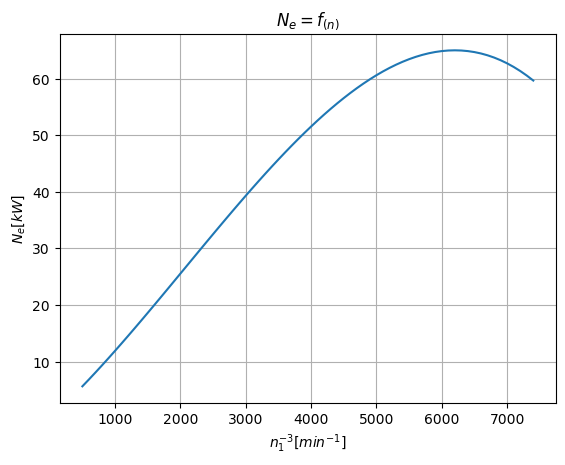

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Points data
x = [5.6306, 6.8402, 8.0737, 9.3297, 10.6063, 11.9021, 13.2153, 14.5443, 15.8875, 17.2433, 18.6100, 19.9859, 21.3695, 22.7591, 24.1530, 25.5497, 26.9474, 28.3446, 29.7397, 31.1309, 32.5166, 33.8953, 35.2652, 36.6248, 37.9724, 39.3063, 40.6250, 41.9268, 43.2100, 44.4730, 45.7142, 46.9320, 48.1246, 49.2906, 50.4281, 51.5357, 52.6116, 53.6543, 54.6620, 55.6332, 56.5663, 57.4595, 58.3112, 59.1199, 59.8838, 60.6014, 61.2709, 61.8908, 62.4595, 62.9752, 63.4364, 63.8414, 64.1886, 64.4764, 64.7030, 64.8669, 64.9665, 65.0000, 64.9659, 64.8625, 64.6883, 64.4414, 64.1204, 63.7236, 63.2493, 62.6959, 62.0618, 61.3454, 60.5449, 59.6588]
y = [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400]

# Create a figure and axes
fig, ax = plt.subplots()

# Set labels and title
ax.set_xlabel('$n_{1}^{-3}[min^{-1}]$')
ax.set_ylabel('$N_{e}[kW]$')
ax.set_title('$N_{e}=f_{(n)}$')

# Add grid
plt.grid(True)

# Plot the points
ax.plot(y, x)



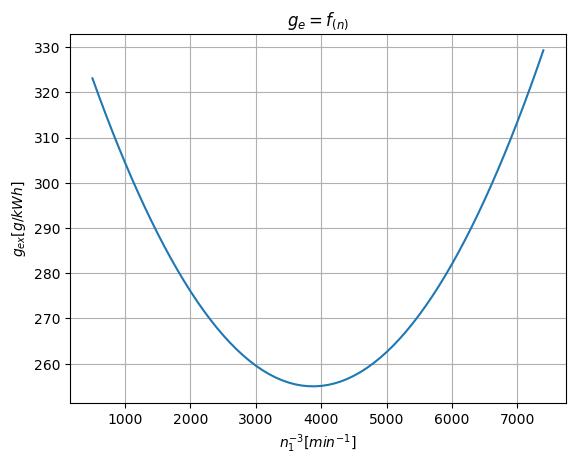

In [77]:
import matplotlib.pyplot as plt

# Y-axis values
y = [323.0894, 319.1132, 315.2566, 311.5195, 307.9021, 304.4042, 301.0259, 297.7672, 294.6281, 291.6086, 288.7086,
     285.9283, 283.2675, 280.7263, 278.3047, 276.0027, 273.8203, 271.7574, 269.8142, 267.9905, 266.2864, 264.7019,
     263.237, 261.8917, 260.6659, 259.5597, 258.5732, 257.7062, 256.9588, 256.3309, 255.8227, 255.4341, 255.165,
     255.0155, 254.9856, 255.0753, 255.2846, 255.6134, 256.0619, 256.6299, 257.3175, 258.1247, 259.0515, 260.0979,
     261.2638, 262.5494, 263.9545, 265.4792, 267.1235, 268.8874, 270.7709, 272.7739, 274.8966, 277.1388, 279.5006,
     281.982, 284.583, 287.3035, 290.1437, 293.1034, 296.1827, 299.3816, 302.7001, 306.1382, 309.6959, 313.3731,
     317.1699, 321.0864, 325.1224, 329.2779]

# X-axis values
x = [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300,
     2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100,
     4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900,
     6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400]

# Plotting the graph
plt.plot(x, y)
plt.xlabel('$n_{1}^{-3}[min^{-1}]$')
plt.ylabel('$g_{ex}[g/kWh]$')
plt.title('$g_{e}=f_{(n)}$')
plt.grid(True)




# Display the plot
plt.show()

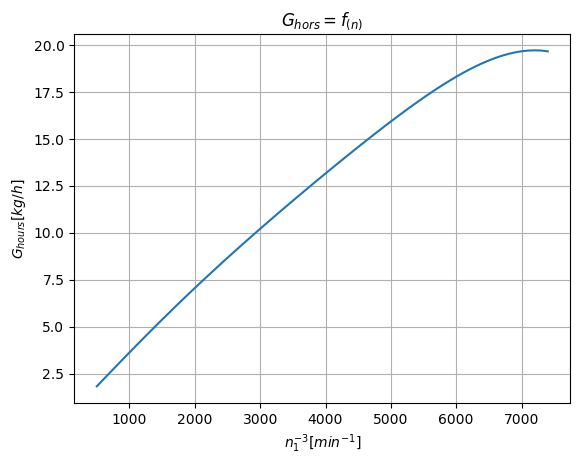

In [136]:
import matplotlib.pyplot as plt

# Y-axis values
y = [1.8192, 2.1828, 2.5453, 2.9064, 3.2657, 3.623, 3.9781, 4.3308, 4.6809, 5.0283, 5.3729, 5.7145, 6.0533, 6.3891,
     6.7219, 7.0518, 7.3788, 7.7029, 8.0242, 8.3428, 8.6587, 8.9722, 9.2831, 9.5917, 9.8981, 10.2023, 10.5045,
     10.8048, 11.1032, 11.3998, 11.6947, 11.988, 12.2797, 12.5699, 12.8584, 13.1455, 13.4309, 13.7148, 13.9969,
     14.2772, 14.5555, 14.8317, 15.1056, 15.377, 15.6455, 15.9108, 16.1727, 16.4307, 16.6844, 16.9332, 17.1767,
     17.4143, 17.6452, 17.8689, 18.0845, 18.2913, 18.4883, 18.6747, 18.8494, 19.0114, 19.1595, 19.2926, 19.4093,
     19.5082, 19.5881, 19.6472, 19.6842, 19.6972, 19.6845, 19.6443]

# X-axis values
x = [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300,
     2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100,
     4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900,
     6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400]

# Plotting the graph
plt.plot(x, y)
plt.xlabel('$n_{1}^{-3}[min^{-1}]$')
plt.ylabel('$G_{hours}[kg/h]$')
plt.title('$G_{hors}=f_{(n)}$')
plt.grid(True)



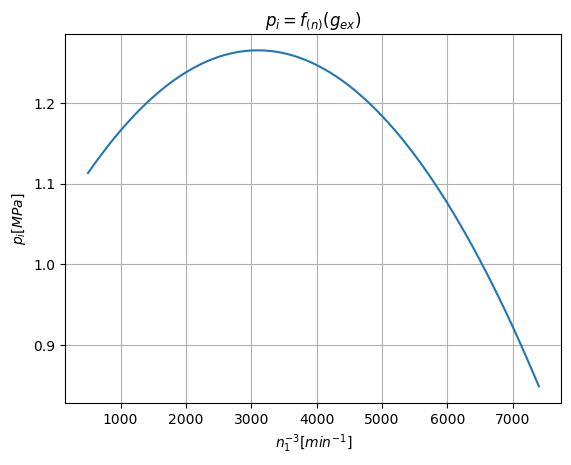

In [94]:
import matplotlib.pyplot as plt

# Y-axis values
y = [1.1129, 1.1244, 1.1354, 1.146, 1.1562, 1.1659, 1.1751, 1.1839, 1.1923, 1.2002, 1.2076, 1.2146, 1.2212, 1.2273,
     1.2329, 1.2381, 1.2428, 1.2471, 1.251, 1.2543, 1.2573, 1.2598, 1.2618, 1.2634, 1.2645, 1.2652, 1.2654, 1.2652,
     1.2645, 1.2634, 1.2618, 1.2598, 1.2573, 1.2543, 1.251, 1.2471, 1.2428, 1.2381, 1.2329, 1.2273, 1.2212, 1.2146,
     1.2076, 1.2002, 1.1923, 1.1839, 1.1751, 1.1659, 1.1562, 1.146, 1.1354, 1.1244, 1.1129, 1.1009, 1.0885, 1.0756,
     1.0623, 1.0485, 1.0343, 1.0197, 1.0045, 0.9890, 0.973, 0.9565, 0.9396, 0.9222, 0.9044, 0.8861, 0.8673, 0.8482]

# X-axis values
x = [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300,
     2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100,
     4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900,
     6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400]


# Plotting the graph
plt.plot(x, y)
plt.xlabel('$n_{1}^{-3}[min^{-1}]$')
plt.ylabel('$p_{i}[MPa]$')
plt.title('$p_{i}=f_{(n)}(g_{ex})$')
plt.grid(True)

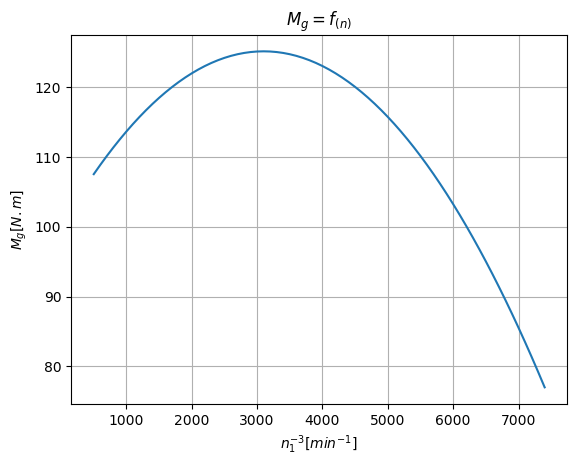

In [98]:
import matplotlib.pyplot as plt

# Y-axis values
y = [107.5441, 108.8724, 110.1487, 111.3729, 112.5449, 113.6649, 114.7328, 115.7486, 116.7123, 117.6239, 118.4834, 119.2909, 120.0462, 120.7494, 121.4006, 121.9996, 122.5466, 123.0415, 123.4843, 123.8750, 124.2136, 124.5001, 124.7345, 124.9168, 125.0470, 125.1252, 125.1512, 125.1252, 125.0470, 124.9168, 124.7345, 124.5001, 124.2136, 123.8750, 123.4843, 123.0415, 122.5466, 121.9996, 121.4006, 120.7494, 120.0462, 119.2909, 118.4834, 117.6239, 116.7123, 115.7486, 114.7328, 113.6649, 112.5449, 111.3729, 110.1487, 108.8724, 107.5441, 106.1636, 104.7311, 103.2465, 101.7098, 100.1210, 98.4801, 96.7871, 95.0420, 93.2448, 91.3955, 89.4942, 87.5407, 85.5352, 83.4775, 81.3678, 79.2060, 76.9921]

# X-axis values
x = [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300,
     2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100,
     4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900,
     6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400]

# Plotting the graph
plt.plot(x, y)
plt.xlabel('$n_{1}^{-3}[min^{-1}]$')
plt.ylabel('$M_{g}[N.m]$')
plt.title('$M_{g}=f_{(n)}$')
plt.grid(True)


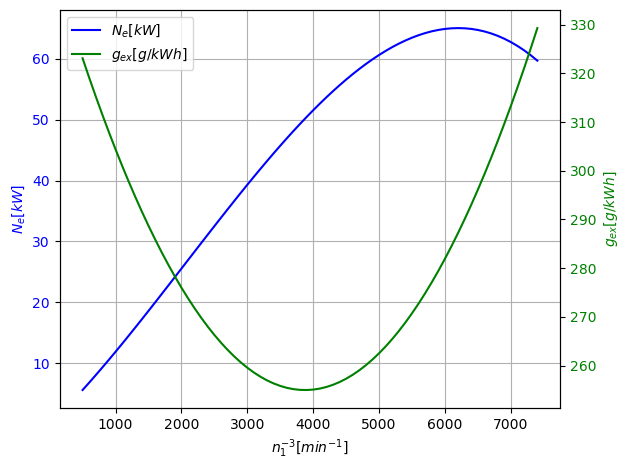

In [119]:
import matplotlib.pyplot as plt

# Y-axis values for Line 1
y1 = [5.6306, 6.8402, 8.0737, 9.3297, 10.6063, 11.9021, 13.2153, 14.5443, 15.8875, 17.2433, 18.6100, 19.9859, 21.3695, 22.7591, 24.1530, 25.5497, 26.9474, 28.3446, 29.7397, 31.1309, 32.5166, 33.8953, 35.2652, 36.6248, 37.9724, 39.3063, 40.6250, 41.9268, 43.2100, 44.4730, 45.7142, 46.9320, 48.1246, 49.2906, 50.4281, 51.5357, 52.6116, 53.6543, 54.6620, 55.6332, 56.5663, 57.4595, 58.3112, 59.1199, 59.8838, 60.6014, 61.2709, 61.8908, 62.4595, 62.9752, 63.4364, 63.8414, 64.1886, 64.4764, 64.7030, 64.8669, 64.9665, 65.0000, 64.9659, 64.8625, 64.6883, 64.4414, 64.1204, 63.7236, 63.2493, 62.6959, 62.0618, 61.3454, 60.5449, 59.6588]

# Y-axis values for Line 2
y2 = [323.0894, 319.1132, 315.2566, 311.5195, 307.9021, 304.4042, 301.0259, 297.7672, 294.6281, 291.6086, 288.7086,
     285.9283, 283.2675, 280.7263, 278.3047, 276.0027, 273.8203, 271.7574, 269.8142, 267.9905, 266.2864, 264.7019,
     263.237, 261.8917, 260.6659, 259.5597, 258.5732, 257.7062, 256.9588, 256.3309, 255.8227, 255.4341, 255.165,
     255.0155, 254.9856, 255.0753, 255.2846, 255.6134, 256.0619, 256.6299, 257.3175, 258.1247, 259.0515, 260.0979,
     261.2638, 262.5494, 263.9545, 265.4792, 267.1235, 268.8874, 270.7709, 272.7739, 274.8966, 277.1388, 279.5006,
     281.982, 284.583, 287.3035, 290.1437, 293.1034, 296.1827, 299.3816, 302.7001, 306.1382, 309.6959, 313.3731,
     317.1699, 321.0864, 325.1224, 329.2779]

x = [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400]

# Create figure and axis objects
fig, ax1 = plt.subplots()

# Plot Line 1 on the left axis
ax1.plot(x, y1, color='blue', label= ('$N_{e}[kW]$'))
ax1.set_xlabel('$n_{1}^{-3}[min^{-1}]$')
ax1.set_ylabel('$N_{e}[kW]$', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.grid(True)

# Create a twin axis for Line 2
ax2 = ax1.twinx()

# Plot Line 2 on the right axis
ax2.plot(x, y2, color='green', label=('$g_{ex}[g/kWh]$'))
ax2.set_ylabel('$g_{ex}[g/kWh]$', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Display legends
lines = [ax1.get_lines()[0], ax2.get_lines()[0]]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()


## Inertial forces

The inertial forces of masses performing rectilinear motion are calculated using the expression:

$$P_{j} = -\frac{m_{j}}{g} \cdot \omega^{2} \cdot R \cdot \left(\frac{\cos(\varphi + \beta)}{\cos\beta} + \lambda \cdot \frac{\cos^{2}\varphi}{\cos^{2}\beta}\right)\cdot 10^{-6}{MN}$$


where

$$ m_{j} = m_{pistongroup} + m_{connectinrod} = 0.76 , kg $$

the mass of the parts carrying out rectilinear motion

$$ m_{pistongroup} = 0.58 kg $$ - mass of piston group (piston and piston bolt);


$$ m_{connectinrod} = 0.18kg $$ - the mass of the connecting rod aligned to the piston;

$$g$$ - ground acceleration;

$$\omega$$ - the angular velocity of the crankshaft;

##### Forces and moments acting on the knuckle brake mechanism (crankshaft mechanism (CM)). 

As a result of the action of the gas, inertial and centrifugal forces, the crankshaft mechanism is loaded with forces that are calculated analytically by the expressions:

$$ N = P_{\Sigma}*tg\beta $$

$$ S = P_{\Sigma}* \frac{1}{\cos\beta} $$

$$ T = P_{\Sigma}* \frac{\sin(\varphi+\beta)}{\cos\beta} $$

$$ Z = P_{\Sigma} *\frac{\cos(\varphi+\beta}{\cos\beta} $$

where 

$$P_{\Sigma}$$

 is the total force acting on the piston.
The centrifugal forces resulting from the rotation of the masses reduced to the crankshaft are calculated by the expressions:

$$ R_{RMM}  =\frac{m_{MK}}{g} * R * \omega^{2} * 10^{-6} = 0.0053 MN $$


$$ R_{RK} =\frac{m_{K}}{g} * R * \omega^{2} * 10^{-6} = 0.0076 MN$$

where

$$\rho_{pr} = 0.052m $$ 

is the distance from the centre of gravity of the counterweights to the crankshaft axis.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg" style="undefined;table-layout: fixed; width: 426px">
<colgroup>
<col style="width: 150px">
<col style="width: 150px">
<col style="width: 150px">
<col style="width: 150px">
</colgroup>
<thead>
  <tr>
    <th class="tg-c3ow">$\varphi$</th>
    <th class="tg-c3ow">Pgaz</th>
    <th class="tg-c3ow">Pj</th>
    <th class="tg-c3ow">Psum</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">Deg</td>
    <td class="tg-0pky">MN</td>
    <td class="tg-0pky">MN</td>
    <td class="tg-0pky">MN</td>
  </tr>
  <tr>
    <td class="tg-0pky">0</td>
    <td class="tg-0pky">-0.0001</td>
    <td class="tg-0pky">-0.0110</td>
    <td class="tg-0pky">-0.0110</td>
  </tr>
  <tr>
    <td class="tg-0pky">10.0000</td>
    <td class="tg-0pky">-0.0001</td>
    <td class="tg-0pky">-0.0107</td>
    <td class="tg-0pky">-0.0108</td>
  </tr>
  <tr>
    <td class="tg-0pky">20.0000</td>
    <td class="tg-0pky">-0.0001</td>
    <td class="tg-0pky">-0.0101</td>
    <td class="tg-0pky">-0.0102</td>
  </tr>
  <tr>
    <td class="tg-0pky">30.0000</td>
    <td class="tg-0pky">-0.0001</td>
    <td class="tg-0pky">-0.0092</td>
    <td class="tg-0pky">-0.0092</td>
  </tr>
  <tr>
    <td class="tg-0pky">40.0000</td>
    <td class="tg-0pky">-0.0001</td>
    <td class="tg-0pky">-0.0079</td>
    <td class="tg-0pky">-0.0079</td>
  </tr>
  <tr>
    <td class="tg-0pky">50.0000</td>
    <td class="tg-0pky">-0.0001</td>
    <td class="tg-0pky">-0.0063</td>
    <td class="tg-0pky">-0.0064</td>
  </tr>
  <tr>
    <td class="tg-0pky">60.0000</td>
    <td class="tg-0pky">-0.0001</td>
    <td class="tg-0pky">-0.0046</td>
    <td class="tg-0pky">-0.0047</td>
  </tr>
  <tr>
    <td class="tg-0pky">70.0000</td>
    <td class="tg-0pky">-0.0001</td>
    <td class="tg-0pky">-0.0028</td>
    <td class="tg-0pky">-0.0029</td>
  </tr>
  <tr>
    <td class="tg-0pky">80.0000</td>
    <td class="tg-0pky">-0.0001</td>
    <td class="tg-0pky">-0.0011</td>
    <td class="tg-0pky">-0.0011</td>
  </tr>
  <tr>
    <td class="tg-0pky">90.0000</td>
    <td class="tg-0pky">-0.0001</td>
    <td class="tg-0pky">0.0006</td>
    <td class="tg-0pky">0.0005</td>
  </tr>
  <tr>
    <td class="tg-0pky">100.0000</td>
    <td class="tg-0pky">-0.0001</td>
    <td class="tg-0pky">0.0020</td>
    <td class="tg-0pky">0.0020</td>
  </tr>
  <tr>
    <td class="tg-0pky">110.0000</td>
    <td class="tg-0pky">-0.0001</td>
    <td class="tg-0pky">0.0033</td>
    <td class="tg-0pky">0.0033</td>
  </tr>
  <tr>
    <td class="tg-0pky">120.0000</td>
    <td class="tg-0pky">-0.0001</td>
    <td class="tg-0pky">0.0043</td>
    <td class="tg-0pky">0.0043</td>
  </tr>
  <tr>
    <td class="tg-0pky">130.0000</td>
    <td class="tg-0pky">-0.0001</td>
    <td class="tg-0pky">0.0051</td>
    <td class="tg-0pky">0.0051</td>
  </tr>
  <tr>
    <td class="tg-0pky">140.0000</td>
    <td class="tg-0pky">-0.0001</td>
    <td class="tg-0pky">0.0057</td>
    <td class="tg-0pky">0.0056</td>
  </tr>
  <tr>
    <td class="tg-0pky">150.0000</td>
    <td class="tg-0pky">-0.0001</td>
    <td class="tg-0pky">0.0061</td>
    <td class="tg-0pky">0.0061</td>
  </tr>
  <tr>
    <td class="tg-0pky">160.0000</td>
    <td class="tg-0pky">-0.0001</td>
    <td class="tg-0pky">0.0064</td>
    <td class="tg-0pky">0.0063</td>
  </tr>
  <tr>
    <td class="tg-0pky">170.0000</td>
    <td class="tg-0pky">-0.0001</td>
    <td class="tg-0pky">0.0065</td>
    <td class="tg-0pky">0.0065</td>
  </tr>
  <tr>
    <td class="tg-0pky">180.0000</td>
    <td class="tg-0pky">-0.0001</td>
    <td class="tg-0pky">0.0066</td>
    <td class="tg-0pky">0.0065</td>
  </tr>
  <tr>
    <td class="tg-0pky">190.0000</td>
    <td class="tg-0pky">-0.0001</td>
    <td class="tg-0pky">0.0065</td>
    <td class="tg-0pky">0.0065</td>
  </tr>
  <tr>
    <td class="tg-0pky">200.0000</td>
    <td class="tg-0pky">-0.0000</td>
    <td class="tg-0pky">0.0064</td>
    <td class="tg-0pky">0.0063</td>
  </tr>
  <tr>
    <td class="tg-0pky">210.0000</td>
    <td class="tg-0pky">-0.0000</td>
    <td class="tg-0pky">0.0061</td>
    <td class="tg-0pky">0.0061</td>
  </tr>
  <tr>
    <td class="tg-0pky">220.0000</td>
    <td class="tg-0pky">-0.0000</td>
    <td class="tg-0pky">0.0057</td>
    <td class="tg-0pky">0.0057</td>
  </tr>
  <tr>
    <td class="tg-0pky">230.0000</td>
    <td class="tg-0pky">0.0000</td>
    <td class="tg-0pky">0.0051</td>
    <td class="tg-0pky">0.0051</td>
  </tr>
  <tr>
    <td class="tg-0pky">240.0000</td>
    <td class="tg-0pky">0.0001</td>
    <td class="tg-0pky">0.0043</td>
    <td class="tg-0pky">0.0044</td>
  </tr>
  <tr>
    <td class="tg-0pky">250.0000</td>
    <td class="tg-0pky">0.0001</td>
    <td class="tg-0pky">0.0033</td>
    <td class="tg-0pky">0.0034</td>
  </tr>
  <tr>
    <td class="tg-0pky">260.0000</td>
    <td class="tg-0pky">0.0002</td>
    <td class="tg-0pky">0.0020</td>
    <td class="tg-0pky">0.0023</td>
  </tr>
  <tr>
    <td class="tg-0pky">270.0000</td>
    <td class="tg-0pky">0.0003</td>
    <td class="tg-0pky">0.0006</td>
    <td class="tg-0pky">0.0009</td>
  </tr>
  <tr>
    <td class="tg-0pky">280.0000</td>
    <td class="tg-0pky">0.0005</td>
    <td class="tg-0pky">-0.0011</td>
    <td class="tg-0pky">-0.0006</td>
  </tr>
  <tr>
    <td class="tg-0pky">290.0000</td>
    <td class="tg-0pky">0.0008</td>
    <td class="tg-0pky">-0.0028</td>
    <td class="tg-0pky">-0.0021</td>
  </tr>
  <tr>
    <td class="tg-0pky">300.0000</td>
    <td class="tg-0pky">0.0011</td>
    <td class="tg-0pky">-0.0046</td>
    <td class="tg-0pky">-0.0035</td>
  </tr>
  <tr>
    <td class="tg-0pky">310.0000</td>
    <td class="tg-0pky">0.0017</td>
    <td class="tg-0pky">-0.0063</td>
    <td class="tg-0pky">-0.0047</td>
  </tr>
  <tr>
    <td class="tg-0pky">320.0000</td>
    <td class="tg-0pky">0.0025</td>
    <td class="tg-0pky">-0.0079</td>
    <td class="tg-0pky">-0.0054</td>
  </tr>
  <tr>
    <td class="tg-0pky">330.0000</td>
    <td class="tg-0pky">0.0038</td>
    <td class="tg-0pky">-0.0092</td>
    <td class="tg-0pky">-0.0054</td>
  </tr>
  <tr>
    <td class="tg-0pky">340.0000</td>
    <td class="tg-0pky">0.0056</td>
    <td class="tg-0pky">-0.0101</td>
    <td class="tg-0pky">-0.0046</td>
  </tr>
  <tr>
    <td class="tg-0pky">350.0000</td>
    <td class="tg-0pky">0.0075</td>
    <td class="tg-0pky">-0.0107</td>
    <td class="tg-0pky">-0.0033</td>
  </tr>
  <tr>
    <td class="tg-0pky">360.0000</td>
    <td class="tg-0pky">0.0297</td>
    <td class="tg-0pky">-0.0110</td>
    <td class="tg-0pky">0.0187</td>
  </tr>
  <tr>
    <td class="tg-0pky">370.0000</td>
    <td class="tg-0pky">0.0312</td>
    <td class="tg-0pky">-0.0107</td>
    <td class="tg-0pky">0.0204</td>
  </tr>
  <tr>
    <td class="tg-0pky">380.0000</td>
    <td class="tg-0pky">0.0242</td>
    <td class="tg-0pky">-0.0101</td>
    <td class="tg-0pky">0.0140</td>
  </tr>
  <tr>
    <td class="tg-0pky">390.0000</td>
    <td class="tg-0pky">0.0174</td>
    <td class="tg-0pky">-0.0092</td>
    <td class="tg-0pky">0.0082</td>
  </tr>
  <tr>
    <td class="tg-0pky">400.0000</td>
    <td class="tg-0pky">0.0124</td>
    <td class="tg-0pky">-0.0079</td>
    <td class="tg-0pky">0.0045</td>
  </tr>
  <tr>
    <td class="tg-0pky">410.0000</td>
    <td class="tg-0pky">0.0090</td>
    <td class="tg-0pky">-0.0063</td>
    <td class="tg-0pky">0.0026</td>
  </tr>
  <tr>
    <td class="tg-0pky">420.0000</td>
    <td class="tg-0pky">0.0067</td>
    <td class="tg-0pky">-0.0046</td>
    <td class="tg-0pky">0.0020</td>
  </tr>
  <tr>
    <td class="tg-0pky">430.0000</td>
    <td class="tg-0pky">0.0052</td>
    <td class="tg-0pky">-0.0028</td>
    <td class="tg-0pky">0.0023</td>
  </tr>
  <tr>
    <td class="tg-0pky">440.0000</td>
    <td class="tg-0pky">0.0041</td>
    <td class="tg-0pky">-0.0011</td>
    <td class="tg-0pky">0.0030</td>
  </tr>
  <tr>
    <td class="tg-0pky">450.0000</td>
    <td class="tg-0pky">0.0034</td>
    <td class="tg-0pky">0.0006</td>
    <td class="tg-0pky">0.0039</td>
  </tr>
  <tr>
    <td class="tg-0pky">460.0000</td>
    <td class="tg-0pky">0.0028</td>
    <td class="tg-0pky">0.0020</td>
    <td class="tg-0pky">0.0049</td>
  </tr>
  <tr>
    <td class="tg-0pky">470.0000</td>
    <td class="tg-0pky">0.0025</td>
    <td class="tg-0pky">0.0033</td>
    <td class="tg-0pky">0.0058</td>
  </tr>
  <tr>
    <td class="tg-0pky">480.0000</td>
    <td class="tg-0pky">0.0022</td>
    <td class="tg-0pky">0.0043</td>
    <td class="tg-0pky">0.0065</td>
  </tr>
  <tr>
    <td class="tg-0pky">490.0000</td>
    <td class="tg-0pky">0.0020</td>
    <td class="tg-0pky">0.0051</td>
    <td class="tg-0pky">0.0071</td>
  </tr>
  <tr>
    <td class="tg-0pky">500.0000</td>
    <td class="tg-0pky">0.0016</td>
    <td class="tg-0pky">0.0057</td>
    <td class="tg-0pky">0.0074</td>
  </tr>
  <tr>
    <td class="tg-0pky">510.0000</td>
    <td class="tg-0pky">0.0011</td>
    <td class="tg-0pky">0.0061</td>
    <td class="tg-0pky">0.0072</td>
  </tr>
  <tr>
    <td class="tg-0pky">520.0000</td>
    <td class="tg-0pky">0.0008</td>
    <td class="tg-0pky">0.0064</td>
    <td class="tg-0pky">0.0071</td>
  </tr>
  <tr>
    <td class="tg-0pky">530.0000</td>
    <td class="tg-0pky">0.0006</td>
    <td class="tg-0pky">0.0065</td>
    <td class="tg-0pky">0.0071</td>
  </tr>
  <tr>
    <td class="tg-0pky">540.0000</td>
    <td class="tg-0pky">0.0003</td>
    <td class="tg-0pky">0.0066</td>
    <td class="tg-0pky">0.0069</td>
  </tr>
  <tr>
    <td class="tg-0pky">550.0000</td>
    <td class="tg-0pky">0.0000</td>
    <td class="tg-0pky">0.0065</td>
    <td class="tg-0pky">0.0066</td>
  </tr>
  <tr>
    <td class="tg-0pky">560.0000</td>
    <td class="tg-0pky">0.0000</td>
    <td class="tg-0pky">0.0064</td>
    <td class="tg-0pky">0.0064</td>
  </tr>
  <tr>
    <td class="tg-0pky">570.0000</td>
    <td class="tg-0pky">0.0000</td>
    <td class="tg-0pky">0.0061</td>
    <td class="tg-0pky">0.0062</td>
  </tr>
  <tr>
    <td class="tg-0pky">580.0000</td>
    <td class="tg-0pky">0.0000</td>
    <td class="tg-0pky">0.0057</td>
    <td class="tg-0pky">0.0058</td>
  </tr>
  <tr>
    <td class="tg-0pky">590.0000</td>
    <td class="tg-0pky">0.0000</td>
    <td class="tg-0pky">0.0051</td>
    <td class="tg-0pky">0.0052</td>
  </tr>
  <tr>
    <td class="tg-0pky">600.0000</td>
    <td class="tg-0pky">0.0000</td>
    <td class="tg-0pky">0.0043</td>
    <td class="tg-0pky">0.0044</td>
  </tr>
  <tr>
    <td class="tg-0pky">610.0000</td>
    <td class="tg-0pky">0.0000</td>
    <td class="tg-0pky">0.0033</td>
    <td class="tg-0pky">0.0034</td>
  </tr>
  <tr>
    <td class="tg-0pky">620.0000</td>
    <td class="tg-0pky">0.0000</td>
    <td class="tg-0pky">0.0020</td>
    <td class="tg-0pky">0.0021</td>
  </tr>
  <tr>
    <td class="tg-0pky">630.0000</td>
    <td class="tg-0pky">0.0000</td>
    <td class="tg-0pky">0.0006</td>
    <td class="tg-0pky">0.0006</td>
  </tr>
  <tr>
    <td class="tg-0pky">640.0000</td>
    <td class="tg-0pky">0.0000</td>
    <td class="tg-0pky">-0.0011</td>
    <td class="tg-0pky">-0.0010</td>
  </tr>
  <tr>
    <td class="tg-0pky">650.0000</td>
    <td class="tg-0pky">0.0000</td>
    <td class="tg-0pky">-0.0028</td>
    <td class="tg-0pky">-0.0028</td>
  </tr>
  <tr>
    <td class="tg-0pky">660.0000</td>
    <td class="tg-0pky">0.0000</td>
    <td class="tg-0pky">-0.0046</td>
    <td class="tg-0pky">-0.0046</td>
  </tr>
  <tr>
    <td class="tg-0pky">670.0000</td>
    <td class="tg-0pky">0.0000</td>
    <td class="tg-0pky">-0.0063</td>
    <td class="tg-0pky">-0.0063</td>
  </tr>
  <tr>
    <td class="tg-0pky">680.0000</td>
    <td class="tg-0pky">0.0000</td>
    <td class="tg-0pky">-0.0079</td>
    <td class="tg-0pky">-0.0078</td>
  </tr>
  <tr>
    <td class="tg-0pky">690.0000</td>
    <td class="tg-0pky">0.0000</td>
    <td class="tg-0pky">-0.0092</td>
    <td class="tg-0pky">-0.0091</td>
  </tr>
  <tr>
    <td class="tg-0pky">700.0000</td>
    <td class="tg-0pky">0.0000</td>
    <td class="tg-0pky">-0.0101</td>
    <td class="tg-0pky">-0.0101</td>
  </tr>
  <tr>
    <td class="tg-0lax">710.0000</td>
    <td class="tg-0lax">0.0000</td>
    <td class="tg-0lax">-0.0107</td>
    <td class="tg-0lax">-0.0107</td>
  </tr>
  <tr>
    <td class="tg-0lax">720.0000</td>
    <td class="tg-0lax">0.0000</td>
    <td class="tg-0lax">-0.0110</td>
    <td class="tg-0lax">-0.0109</td>
  </tr>
</tbody>
</table>
</table>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg" style="undefined;table-layout: fixed; width: 455px">
<colgroup>
<col style="width: 150px">
<col style="width: 150px">
<col style="width: 150px">
<col style="width: 150px">
<col style="width: 150px">
</colgroup>
<thead>
  <tr>
    <th class="tg-c3ow">ϕ</th>
    <th class="tg-c3ow">N</th>
    <th class="tg-c3ow">S</th>
    <th class="tg-c3ow">T</th>
    <th class="tg-0lax">Z</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">deg</td>
    <td class="tg-0pky">N</td>
    <td class="tg-0pky">N</td>
    <td class="tg-0pky">N</td>
    <td class="tg-0lax">N</td>
  </tr>
  <tr>
    <td class="tg-0pky">0</td>
    <td class="tg-0pky">0</td>
    <td class="tg-0pky">-0.0110</td>
    <td class="tg-0pky">0</td>
    <td class="tg-0lax">-0.0110</td>
  </tr>
  <tr>
    <td class="tg-0pky">10.0000</td>
    <td class="tg-0pky">-0.0005</td>
    <td class="tg-0pky">-0.0108</td>
    <td class="tg-0pky">-0.0023</td>
    <td class="tg-0lax">-0.0106</td>
  </tr>
  <tr>
    <td class="tg-0pky">20.0000</td>
    <td class="tg-0pky">-0.0009</td>
    <td class="tg-0pky">-0.0102</td>
    <td class="tg-0pky">-0.0043</td>
    <td class="tg-0lax">-0.0093</td>
  </tr>
  <tr>
    <td class="tg-0pky">30.0000</td>
    <td class="tg-0pky">-0.0012</td>
    <td class="tg-0pky">-0.0093</td>
    <td class="tg-0pky">-0.0056</td>
    <td class="tg-0lax">-0.0074</td>
  </tr>
  <tr>
    <td class="tg-0pky">40.0000</td>
    <td class="tg-0pky">-0.0013</td>
    <td class="tg-0pky">-0.0080</td>
    <td class="tg-0pky">-0.0061</td>
    <td class="tg-0lax">-0.0053</td>
  </tr>
  <tr>
    <td class="tg-0pky">50.0000</td>
    <td class="tg-0pky">-0.0012</td>
    <td class="tg-0pky">-0.0065</td>
    <td class="tg-0pky">-0.0057</td>
    <td class="tg-0lax">-0.0032</td>
  </tr>
  <tr>
    <td class="tg-0pky">60.0000</td>
    <td class="tg-0pky">-0.0010</td>
    <td class="tg-0pky">-0.0048</td>
    <td class="tg-0pky">-0.0046</td>
    <td class="tg-0lax">-0.0014</td>
  </tr>
  <tr>
    <td class="tg-0pky">70.0000</td>
    <td class="tg-0pky">-0.0007</td>
    <td class="tg-0pky">-0.0030</td>
    <td class="tg-0pky">-0.0030</td>
    <td class="tg-0lax">-0.0003</td>
  </tr>
  <tr>
    <td class="tg-0pky">80.0000</td>
    <td class="tg-0pky">-0.0003</td>
    <td class="tg-0pky">-0.0012</td>
    <td class="tg-0pky">-0.0012</td>
    <td class="tg-0lax">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">90.0000</td>
    <td class="tg-0pky">0.0001</td>
    <td class="tg-0pky">0.0005</td>
    <td class="tg-0pky">0.0005</td>
    <td class="tg-0lax">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">100.0000</td>
    <td class="tg-0pky">0.0005</td>
    <td class="tg-0pky">0.0021</td>
    <td class="tg-0pky">0.0019</td>
    <td class="tg-0lax">-0.0008</td>
  </tr>
  <tr>
    <td class="tg-0pky">110.0000</td>
    <td class="tg-0pky">0.0008</td>
    <td class="tg-0pky">0.0033</td>
    <td class="tg-0pky">0.0028</td>
    <td class="tg-0lax">-0.0019</td>
  </tr>
  <tr>
    <td class="tg-0pky">120.0000</td>
    <td class="tg-0pky">0.0009</td>
    <td class="tg-0pky">0.0044</td>
    <td class="tg-0pky">0.0032</td>
    <td class="tg-0lax">-0.0030</td>
  </tr>
  <tr>
    <td class="tg-0pky">130.0000</td>
    <td class="tg-0pky">0.0010</td>
    <td class="tg-0pky">0.0052</td>
    <td class="tg-0pky">0.0032</td>
    <td class="tg-0lax">-0.0040</td>
  </tr>
  <tr>
    <td class="tg-0pky">140.0000</td>
    <td class="tg-0pky">0.0009</td>
    <td class="tg-0pky">0.0057</td>
    <td class="tg-0pky">0.0029</td>
    <td class="tg-0lax">-0.0049</td>
  </tr>
  <tr>
    <td class="tg-0pky">150.0000</td>
    <td class="tg-0pky">0.0008</td>
    <td class="tg-0pky">0.0061</td>
    <td class="tg-0pky">0.0024</td>
    <td class="tg-0lax">-0.0056</td>
  </tr>
  <tr>
    <td class="tg-0pky">160.0000</td>
    <td class="tg-0pky">0.0005</td>
    <td class="tg-0pky">0.0063</td>
    <td class="tg-0pky">0.0017</td>
    <td class="tg-0lax">-0.0061</td>
  </tr>
  <tr>
    <td class="tg-0pky">170.0000</td>
    <td class="tg-0pky">0.0003</td>
    <td class="tg-0pky">0.0065</td>
    <td class="tg-0pky">0.0008</td>
    <td class="tg-0lax">-0.0064</td>
  </tr>
  <tr>
    <td class="tg-0pky">180.0000</td>
    <td class="tg-0pky">0.0000</td>
    <td class="tg-0pky">0.0065</td>
    <td class="tg-0pky">0.0000</td>
    <td class="tg-0lax">-0.0065</td>
  </tr>
  <tr>
    <td class="tg-0pky">190.0000</td>
    <td class="tg-0pky">-0.0003</td>
    <td class="tg-0pky">0.0065</td>
    <td class="tg-0pky">-0.0008</td>
    <td class="tg-0lax">-0.0064</td>
  </tr>
  <tr>
    <td class="tg-0pky">200.0000</td>
    <td class="tg-0pky">-0.0005</td>
    <td class="tg-0pky">0.0064</td>
    <td class="tg-0pky">-0.0017</td>
    <td class="tg-0lax">-0.0061</td>
  </tr>
  <tr>
    <td class="tg-0pky">210.0000</td>
    <td class="tg-0pky">-0.0008</td>
    <td class="tg-0pky">0.0061</td>
    <td class="tg-0pky">-0.0024</td>
    <td class="tg-0lax">-0.0057</td>
  </tr>
  <tr>
    <td class="tg-0pky">220.0000</td>
    <td class="tg-0pky">-0.0009</td>
    <td class="tg-0pky">0.0058</td>
    <td class="tg-0pky">-0.0030</td>
    <td class="tg-0lax">-0.0050</td>
  </tr>
  <tr>
    <td class="tg-0pky">230.0000</td>
    <td class="tg-0pky">-0.0010</td>
    <td class="tg-0pky">0.0052</td>
    <td class="tg-0pky">-0.0033</td>
    <td class="tg-0lax">-0.0041</td>
  </tr>
  <tr>
    <td class="tg-0pky">240.0000</td>
    <td class="tg-0pky">-0.0010</td>
    <td class="tg-0pky">0.0045</td>
    <td class="tg-0pky">-0.0033</td>
    <td class="tg-0lax">-0.0030</td>
  </tr>
  <tr>
    <td class="tg-0pky">250.0000</td>
    <td class="tg-0pky">-0.0008</td>
    <td class="tg-0pky">0.0035</td>
    <td class="tg-0pky">-0.0030</td>
    <td class="tg-0lax">-0.0020</td>
  </tr>
  <tr>
    <td class="tg-0pky">260.0000</td>
    <td class="tg-0pky">-0.0006</td>
    <td class="tg-0pky">0.0023</td>
    <td class="tg-0pky">-0.0021</td>
    <td class="tg-0lax">-0.0010</td>
  </tr>
  <tr>
    <td class="tg-0pky">270.0000</td>
    <td class="tg-0pky">-0.0002</td>
    <td class="tg-0pky">0.0009</td>
    <td class="tg-0pky">-0.0009</td>
    <td class="tg-0lax">-0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">280.0000</td>
    <td class="tg-0pky">0.0001</td>
    <td class="tg-0pky">-0.0006</td>
    <td class="tg-0pky">0.0006</td>
    <td class="tg-0lax">0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">290.0000</td>
    <td class="tg-0pky">0.0005</td>
    <td class="tg-0pky">-0.0021</td>
    <td class="tg-0pky">0.0021</td>
    <td class="tg-0lax">-0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">300.0000</td>
    <td class="tg-0pky">0.0008</td>
    <td class="tg-0pky">-0.0036</td>
    <td class="tg-0pky">0.0034</td>
    <td class="tg-0lax">-0.0011</td>
  </tr>
  <tr>
    <td class="tg-0pky">310.0000</td>
    <td class="tg-0pky">0.0009</td>
    <td class="tg-0pky">-0.0048</td>
    <td class="tg-0pky">0.0042</td>
    <td class="tg-0lax">-0.0023</td>
  </tr>
  <tr>
    <td class="tg-0pky">320.0000</td>
    <td class="tg-0pky">0.0009</td>
    <td class="tg-0pky">-0.0054</td>
    <td class="tg-0pky">0.0041</td>
    <td class="tg-0lax">-0.0035</td>
  </tr>
  <tr>
    <td class="tg-0pky">330.0000</td>
    <td class="tg-0pky">0.0007</td>
    <td class="tg-0pky">-0.0054</td>
    <td class="tg-0pky">0.0033</td>
    <td class="tg-0lax">-0.0043</td>
  </tr>
  <tr>
    <td class="tg-0pky">340.0000</td>
    <td class="tg-0pky">0.0004</td>
    <td class="tg-0pky">-0.0046</td>
    <td class="tg-0pky">0.0019</td>
    <td class="tg-0lax">-0.0042</td>
  </tr>
  <tr>
    <td class="tg-0pky">350.0000</td>
    <td class="tg-0pky">0.0001</td>
    <td class="tg-0pky">-0.0033</td>
    <td class="tg-0pky">0.0007</td>
    <td class="tg-0lax">-0.0032</td>
  </tr>
  <tr>
    <td class="tg-0pky">360.0000</td>
    <td class="tg-0pky">-0.0000</td>
    <td class="tg-0pky">0.0187</td>
    <td class="tg-0pky">-0.0000</td>
    <td class="tg-0lax">0.0187</td>
  </tr>
  <tr>
    <td class="tg-0pky">370.0000</td>
    <td class="tg-0pky">0.0009</td>
    <td class="tg-0pky">0.0204</td>
    <td class="tg-0pky">0.0044</td>
    <td class="tg-0lax">0.0200</td>
  </tr>
  <tr>
    <td class="tg-0pky">380.0000</td>
    <td class="tg-0pky">0.0012</td>
    <td class="tg-0pky">0.0141</td>
    <td class="tg-0pky">0.0059</td>
    <td class="tg-0lax">0.0128</td>
  </tr>
  <tr>
    <td class="tg-0pky">390.0000</td>
    <td class="tg-0pky">0.0010</td>
    <td class="tg-0pky">0.0083</td>
    <td class="tg-0pky">0.0050</td>
    <td class="tg-0lax">0.0066</td>
  </tr>
  <tr>
    <td class="tg-0pky">400.0000</td>
    <td class="tg-0pky">0.0007</td>
    <td class="tg-0pky">0.0045</td>
    <td class="tg-0pky">0.0034</td>
    <td class="tg-0lax">0.0030</td>
  </tr>
  <tr>
    <td class="tg-0pky">410.0000</td>
    <td class="tg-0pky">0.0005</td>
    <td class="tg-0pky">0.0027</td>
    <td class="tg-0pky">0.0023</td>
    <td class="tg-0lax">0.0013</td>
  </tr>
  <tr>
    <td class="tg-0pky">420.0000</td>
    <td class="tg-0pky">0.0005</td>
    <td class="tg-0pky">0.0021</td>
    <td class="tg-0pky">0.0020</td>
    <td class="tg-0lax">0.0006</td>
  </tr>
  <tr>
    <td class="tg-0pky">430.0000</td>
    <td class="tg-0pky">0.0006</td>
    <td class="tg-0pky">0.0024</td>
    <td class="tg-0pky">0.0024</td>
    <td class="tg-0lax">0.0003</td>
  </tr>
  <tr>
    <td class="tg-0pky">440.0000</td>
    <td class="tg-0pky">0.0008</td>
    <td class="tg-0pky">0.0031</td>
    <td class="tg-0pky">0.0031</td>
    <td class="tg-0lax">-0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">450.0000</td>
    <td class="tg-0pky">0.0010</td>
    <td class="tg-0pky">0.0041</td>
    <td class="tg-0pky">0.0039</td>
    <td class="tg-0lax">-0.0010</td>
  </tr>
  <tr>
    <td class="tg-0pky">460.0000</td>
    <td class="tg-0pky">0.0012</td>
    <td class="tg-0pky">0.0050</td>
    <td class="tg-0pky">0.0046</td>
    <td class="tg-0lax">-0.0021</td>
  </tr>
  <tr>
    <td class="tg-0pky">470.0000</td>
    <td class="tg-0pky">0.0014</td>
    <td class="tg-0pky">0.0059</td>
    <td class="tg-0pky">0.0049</td>
    <td class="tg-0lax">-0.0033</td>
  </tr>
  <tr>
    <td class="tg-0pky">480.0000</td>
    <td class="tg-0pky">0.0014</td>
    <td class="tg-0pky">0.0067</td>
    <td class="tg-0pky">0.0049</td>
    <td class="tg-0lax">-0.0045</td>
  </tr>
  <tr>
    <td class="tg-0pky">490.0000</td>
    <td class="tg-0pky">0.0014</td>
    <td class="tg-0pky">0.0072</td>
    <td class="tg-0pky">0.0045</td>
    <td class="tg-0lax">-0.0056</td>
  </tr>
  <tr>
    <td class="tg-0pky">500.0000</td>
    <td class="tg-0pky">0.0012</td>
    <td class="tg-0pky">0.0075</td>
    <td class="tg-0pky">0.0038</td>
    <td class="tg-0lax">-0.0064</td>
  </tr>
  <tr>
    <td class="tg-0pky">510.0000</td>
    <td class="tg-0pky">0.0009</td>
    <td class="tg-0pky">0.0073</td>
    <td class="tg-0pky">0.0028</td>
    <td class="tg-0lax">-0.0067</td>
  </tr>
  <tr>
    <td class="tg-0pky">520.0000</td>
    <td class="tg-0pky">0.0006</td>
    <td class="tg-0pky">0.0072</td>
    <td class="tg-0pky">0.0019</td>
    <td class="tg-0lax">-0.0069</td>
  </tr>
  <tr>
    <td class="tg-0pky">530.0000</td>
    <td class="tg-0pky">0.0003</td>
    <td class="tg-0pky">0.0071</td>
    <td class="tg-0pky">0.0009</td>
    <td class="tg-0lax">-0.0070</td>
  </tr>
  <tr>
    <td class="tg-0pky">540.0000</td>
    <td class="tg-0pky">0.0000</td>
    <td class="tg-0pky">0.0069</td>
    <td class="tg-0pky">0.0000</td>
    <td class="tg-0lax">-0.0069</td>
  </tr>
  <tr>
    <td class="tg-0pky">550.0000</td>
    <td class="tg-0pky">-0.0003</td>
    <td class="tg-0pky">0.0066</td>
    <td class="tg-0pky">-0.0009</td>
    <td class="tg-0lax">-0.0065</td>
  </tr>
  <tr>
    <td class="tg-0pky">560.0000</td>
    <td class="tg-0pky">-0.0006</td>
    <td class="tg-0pky">0.0064</td>
    <td class="tg-0pky">-0.0017</td>
    <td class="tg-0lax">-0.0062</td>
  </tr>
  <tr>
    <td class="tg-0pky">570.0000</td>
    <td class="tg-0pky">-0.0008</td>
    <td class="tg-0pky">0.0062</td>
    <td class="tg-0pky">-0.0024</td>
    <td class="tg-0lax">-0.0057</td>
  </tr>
  <tr>
    <td class="tg-0pky">580.0000</td>
    <td class="tg-0pky">-0.0009</td>
    <td class="tg-0pky">0.0058</td>
    <td class="tg-0pky">-0.0030</td>
    <td class="tg-0lax">-0.0050</td>
  </tr>
  <tr>
    <td class="tg-0pky">590.0000</td>
    <td class="tg-0pky">-0.0010</td>
    <td class="tg-0pky">0.0053</td>
    <td class="tg-0pky">-0.0033</td>
    <td class="tg-0lax">-0.0041</td>
  </tr>
  <tr>
    <td class="tg-0pky">600.0000</td>
    <td class="tg-0pky">-0.0010</td>
    <td class="tg-0pky">0.0045</td>
    <td class="tg-0pky">-0.0033</td>
    <td class="tg-0lax">-0.0030</td>
  </tr>
  <tr>
    <td class="tg-0pky">610.0000</td>
    <td class="tg-0pky">-0.0008</td>
    <td class="tg-0pky">0.0035</td>
    <td class="tg-0pky">-0.0029</td>
    <td class="tg-0lax">-0.0019</td>
  </tr>
  <tr>
    <td class="tg-0pky">620.0000</td>
    <td class="tg-0pky">-0.0005</td>
    <td class="tg-0pky">0.0022</td>
    <td class="tg-0pky">-0.0020</td>
    <td class="tg-0lax">-0.0009</td>
  </tr>
  <tr>
    <td class="tg-0pky">630.0000</td>
    <td class="tg-0pky">-0.0002</td>
    <td class="tg-0pky">0.0006</td>
    <td class="tg-0pky">-0.0006</td>
    <td class="tg-0lax">-0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">640.0000</td>
    <td class="tg-0pky">0.0003</td>
    <td class="tg-0pky">-0.0011</td>
    <td class="tg-0pky">0.0011</td>
    <td class="tg-0lax">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">650.0000</td>
    <td class="tg-0pky">0.0007</td>
    <td class="tg-0pky">-0.0029</td>
    <td class="tg-0pky">0.0029</td>
    <td class="tg-0lax">-0.0003</td>
  </tr>
  <tr>
    <td class="tg-0pky">660.0000</td>
    <td class="tg-0pky">0.0010</td>
    <td class="tg-0pky">-0.0047</td>
    <td class="tg-0pky">0.0045</td>
    <td class="tg-0lax">-0.0014</td>
  </tr>
  <tr>
    <td class="tg-0pky">670.0000</td>
    <td class="tg-0pky">0.0012</td>
    <td class="tg-0pky">-0.0064</td>
    <td class="tg-0pky">0.0056</td>
    <td class="tg-0lax">-0.0031</td>
  </tr>
  <tr>
    <td class="tg-0pky">680.0000</td>
    <td class="tg-0pky">0.0013</td>
    <td class="tg-0pky">-0.0079</td>
    <td class="tg-0pky">0.0060</td>
    <td class="tg-0lax">-0.0052</td>
  </tr>
  <tr>
    <td class="tg-0pky">690.0000</td>
    <td class="tg-0pky">0.0011</td>
    <td class="tg-0pky">-0.0092</td>
    <td class="tg-0pky">0.0056</td>
    <td class="tg-0lax">-0.0073</td>
  </tr>
  <tr>
    <td class="tg-0pky">700.0000</td>
    <td class="tg-0pky">0.0009</td>
    <td class="tg-0pky">-0.0101</td>
    <td class="tg-0pky">0.0043</td>
    <td class="tg-0lax">-0.0092</td>
  </tr>
  <tr>
    <td class="tg-0pky">710.0000</td>
    <td class="tg-0pky">0.0005</td>
    <td class="tg-0pky">-0.0107</td>
    <td class="tg-0pky">0.0023</td>
    <td class="tg-0lax">-0.0105</td>
  </tr>
  <tr>
    <td class="tg-0pky">720.0000</td>
    <td class="tg-0pky">0.0000</td>
    <td class="tg-0pky">-0.0109</td>
    <td class="tg-0pky">0.0000</td>
    <td class="tg-0lax">-0.0109</td>
  </tr>
</tbody>
</table>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg" style="undefined;table-layout: fixed; width: 181px">
<colgroup>
<col style="width: 200px">
<col style="width: 200px">
</colgroup>
<thead>
  <tr>
    <th class="tg-c3ow">ϕ</th>
    <th class="tg-c3ow">$M_{1}$</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">deg</td>
    <td class="tg-0pky">MN.m</td>
  </tr>
  <tr>
    <td class="tg-0pky">0</td>
    <td class="tg-0pky">0</td>
  </tr>
  <tr>
    <td class="tg-0pky">10.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">20.0000</td>
    <td class="tg-0pky">-0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">30.0000</td>
    <td class="tg-0pky">-0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">40.0000</td>
    <td class="tg-0pky">-0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">50.0000</td>
    <td class="tg-0pky">-0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">60.0000</td>
    <td class="tg-0pky">-0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">70.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">80.0000</td>
    <td class="tg-0pky">-0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">90.0000</td>
    <td class="tg-0pky">0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">100.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">110.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">120.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">130.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">140.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">150.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">160.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">170.0000</td>
    <td class="tg-0pky">0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">180.0000</td>
    <td class="tg-0pky">0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">190.0000</td>
    <td class="tg-0pky">-0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">200.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">210.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">220.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">230.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">240.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">250.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">260.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">270.0000</td>
    <td class="tg-0pky">-0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">280.0000</td>
    <td class="tg-0pky">0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">290.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">300.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">310.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">320.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">330.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">340.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">350.0000</td>
    <td class="tg-0pky">0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">360.0000</td>
    <td class="tg-0pky">-0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">370.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">380.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">390.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">400.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">410.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">420.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">430.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">440.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">450.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">460.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">470.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">480.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">490.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">500.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">510.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">520.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">530.0000</td>
    <td class="tg-0pky">0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">540.0000</td>
    <td class="tg-0pky">0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">550.0000</td>
    <td class="tg-0pky">-0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">560.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">570.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">580.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">590.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">600.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">610.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">620.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">630.0000</td>
    <td class="tg-0pky">-0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">640.0000</td>
    <td class="tg-0pky">0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">650.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">660.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">670.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">680.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">690.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">700.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">710.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">720.0000</td>
    <td class="tg-0pky">0.0000</td>
  </tr>
</tbody>
</table>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg" style="undefined;table-layout: fixed; width: 181px">
<colgroup>
<col style="width: 200px">
<col style="width: 200px">
</colgroup>
<thead>
  <tr>
    <th class="tg-c3ow">ϕ</th>
    <th class="tg-c3ow">$M_{v}$</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">deg</td>
    <td class="tg-0pky">MN.m</td>
  </tr>
  <tr>
    <td class="tg-0pky">0</td>
    <td class="tg-0pky">-0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">10.0000</td>
    <td class="tg-0pky">0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">20.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">30.0000</td>
    <td class="tg-0pky">-0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">40.0000</td>
    <td class="tg-0pky">-0.0003</td>
  </tr>
  <tr>
    <td class="tg-0pky">50.0000</td>
    <td class="tg-0pky">-0.0004</td>
  </tr>
  <tr>
    <td class="tg-0pky">60.0000</td>
    <td class="tg-0pky">-0.0004</td>
  </tr>
  <tr>
    <td class="tg-0pky">70.0000</td>
    <td class="tg-0pky">-0.0003</td>
  </tr>
  <tr>
    <td class="tg-0pky">80.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">90.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">100.0000</td>
    <td class="tg-0pky">0.0003</td>
  </tr>
  <tr>
    <td class="tg-0pky">110.0000</td>
    <td class="tg-0pky">0.0005</td>
  </tr>
  <tr>
    <td class="tg-0pky">120.0000</td>
    <td class="tg-0pky">0.0006</td>
  </tr>
  <tr>
    <td class="tg-0pky">130.0000</td>
    <td class="tg-0pky">0.0007</td>
  </tr>
  <tr>
    <td class="tg-0pky">140.0000</td>
    <td class="tg-0pky">0.0007</td>
  </tr>
  <tr>
    <td class="tg-0pky">150.0000</td>
    <td class="tg-0pky">0.0005</td>
  </tr>
  <tr>
    <td class="tg-0pky">160.0000</td>
    <td class="tg-0pky">0.0004</td>
  </tr>
  <tr>
    <td class="tg-0pky">170.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">180.0000</td>
    <td class="tg-0pky">0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">190.0000</td>
    <td class="tg-0pky">-0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">200.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">210.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">220.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">230.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">240.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">250.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">260.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">270.0000</td>
    <td class="tg-0pky">-0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">280.0000</td>
    <td class="tg-0pky">0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">290.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">300.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">310.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">320.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">330.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">340.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">350.0000</td>
    <td class="tg-0pky">0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">360.0000</td>
    <td class="tg-0pky">-0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">370.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">380.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">390.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">400.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">410.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">420.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">430.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">440.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">450.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">460.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">470.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">480.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">490.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">500.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">510.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">520.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">530.0000</td>
    <td class="tg-0pky">0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">540.0000</td>
    <td class="tg-0pky">0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">550.0000</td>
    <td class="tg-0pky">-0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">560.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">570.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">580.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">590.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">600.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">610.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">620.0000</td>
    <td class="tg-0pky">-0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">630.0000</td>
    <td class="tg-0pky">-0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">640.0000</td>
    <td class="tg-0pky">0.0000</td>
  </tr>
  <tr>
    <td class="tg-0pky">650.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">660.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">670.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">680.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">690.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">700.0000</td>
    <td class="tg-0pky">0.0002</td>
  </tr>
  <tr>
    <td class="tg-0pky">710.0000</td>
    <td class="tg-0pky">0.0001</td>
  </tr>
  <tr>
    <td class="tg-0pky">720.0000</td>
    <td class="tg-0pky">0.0000</td>
  </tr>
</tbody>
</table>

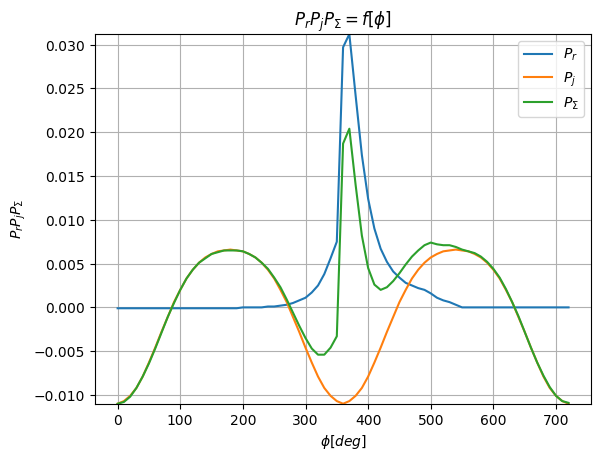

In [28]:
import matplotlib.pyplot as plt

# Data for the y-axis
pgaz =[-0.0001 , -0.0001  , -0.0001  , -0.0001  , -0.0001  , -0.0001 , -0.0001 , -0.0001 , -0.0001, -0.0001, -0.0001 , -0.0001, -0.0001, -0.0001 , -0.0001, -0.0001, -0.0001, -0.0001, -0.0001,
       -0.0001, -0.0000, -0.0000, -0.0000, 0.0000, 0.0001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0008, 0.0011, 0.0017, 0.0025, 0.0038, 0.0056, 0.0075, 0.0297, 0.0312, 0.0242,
       0.0174, 0.0124, 0.0090, 0.0067, 0.0052, 0.0041, 0.0034, 0.0028, 0.0025, 0.0022, 0.0020, 0.0016, 0.0011, 0.0008, 0.0006, 0.0003, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
       0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]


pj = [-0.0110, -0.0107, -0.0101, -0.0092, -0.0079, -0.0063, -0.0046, -0.0028, -0.0011, 0.0006, 0.0020,
      0.0033, 0.0043, 0.0051, 0.0057, 0.0061, 0.0064, 0.0065, 0.0066, 0.0065, 0.0064, 0.0061, 0.0057,
      0.0051, 0.0043, 0.0033, 0.0020, 0.0006, -0.0011, -0.0028, -0.0046, -0.0063, -0.0079, -0.0092,
      -0.0101, -0.0107, -0.0110, -0.0107, -0.0101, -0.0092, -0.0079, -0.0063, -0.0046, -0.0028,
      -0.0011, 0.0006, 0.0020, 0.0033, 0.0043, 0.0051, 0.0057, 0.0061, 0.0064, 0.0065, 0.0066, 0.0065,
      0.0064, 0.0061, 0.0057, 0.0051, 0.0043, 0.0033, 0.0020, 0.0006, -0.0011, -0.0028, -0.0046,
      -0.0063, -0.0079, -0.0092, -0.0101, -0.0107, -0.0110]


psum = [-0.0110, -0.0108, -0.0102, -0.0092, -0.0079, -0.0064, -0.0047, -0.0029, -0.0011, 0.0005, 0.0020,
        0.0033, 0.0043, 0.0051, 0.0056, 0.0061, 0.0063, 0.0065, 0.0065, 0.0065, 0.0064, 0.0061, 0.0057,
        0.0051, 0.0044, 0.0034, 0.0023, 0.0009, -0.0006, -0.0021, -0.0035, -0.0047, -0.0054, -0.0054,
        -0.0046, -0.0033, 0.0187, 0.0204, 0.0140, 0.0082, 0.0045, 0.0026, 0.0020, 0.0023, 0.0030, 0.0039,
        0.0049, 0.0058, 0.0065, 0.0071, 0.0074, 0.0072, 0.0071, 0.0071, 0.0069, 0.0066, 0.0064, 0.0062,
        0.0058, 0.0052, 0.0044, 0.0034, 0.0021, 0.0006, -0.0010, -0.0028, -0.0046, -0.0063, -0.0078,
        -0.0091, -0.0101, -0.0107, -0.0109]

# Data for the x-axis
phi_deg = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200,
           210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
           390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560,
           570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720]

# Create the figure and axis objects
fig, ax = plt.subplots()


# Plot the data for each lane
ax.plot(phi_deg, pgaz, label='$P_r$')
ax.plot(phi_deg, pj, label='$P_{j}$')
ax.plot(phi_deg, psum, label='$P_{\Sigma}$')
plt.grid(True)

# Add labels and title
ax.set_xlabel('$\phi [deg]$')
ax.set_ylabel('$P_{r}P_{j}P_{\Sigma}$')
ax.set_title('$P_{r}P_{j}P_{\Sigma} =f[\phi]$')

# Adjust the y-axis limits to show all lines
ax.set_ylim(min(pgaz + pj + psum), max(pgaz + pj + psum))

# Add a legend
ax.legend()

# Show the plot
plt.show()



<Figure size 800x600 with 0 Axes>

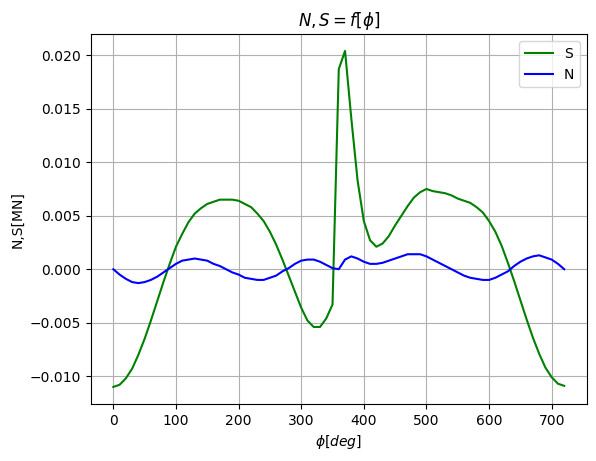

In [58]:
import matplotlib.pyplot as plt

# Data for the y-axis (first column)
y1 = [-0.0110, -0.0108, -0.0102, -0.0093, -0.0080, -0.0065, -0.0048, -0.0030, -0.0012, 0.0005, 0.0021,
     0.0033, 0.0044, 0.0052, 0.0057, 0.0061, 0.0063, 0.0065, 0.0065, 0.0065, 0.0064, 0.0061, 0.0058, 0.0052,
     0.0045, 0.0035, 0.0023, 0.0009, -0.0006, -0.0021, -0.0036, -0.0048, -0.0054, -0.0054, -0.0046, -0.0033,
     0.0187, 0.0204, 0.0141, 0.0083, 0.0045, 0.0027, 0.0021, 0.0024, 0.0031, 0.0041, 0.0050, 0.0059, 0.0067,
     0.0072, 0.0075, 0.0073, 0.0072, 0.0071, 0.0069, 0.0066, 0.0064, 0.0062, 0.0058, 0.0053, 0.0045, 0.0035,
     0.0022, 0.0006, -0.0011, -0.0029, -0.0047, -0.0064, -0.0079, -0.0092, -0.0101, -0.0107, -0.0109]

# Data for the y-axis (second column)
y2 = [0.0000, -0.0005, -0.0009, -0.0012, -0.0013, -0.0012, -0.0010, -0.0007, -0.0003, 0.0001, 0.0005, 0.0008,
      0.0009, 0.0010, 0.0009, 0.0008, 0.0005, 0.0003, 0.0000, -0.0003, -0.0005, -0.0008, -0.0009, -0.0010,
      -0.0010, -0.0008, -0.0006, -0.0002, 0.0001, 0.0005, 0.0008, 0.0009, 0.0009, 0.0007, 0.0004, 0.0001,
      -0.0000, 0.0009, 0.0012, 0.0010, 0.0007, 0.0005, 0.0005, 0.0006, 0.0008, 0.0010, 0.0012, 0.0014,
      0.0014, 0.0014, 0.0012, 0.0009, 0.0006, 0.0003, 0.0000, -0.0003, -0.0006, -0.0008, -0.0009, -0.0010,
      -0.0010, -0.0008, -0.0005, -0.0002, 0.0003, 0.0007, 0.0010, 0.0012, 0.0013, 0.0011, 0.0009, 0.0005, 0.0000]

# Data for the x-axis
phi_deg = [i*10 for i in range(len(y1))]
phi_deg = [i*10 for i in range(len(y2))]

# Create a figure
plt.figure(figsize=(8, 6))

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the data

ax.plot(phi_deg, y1, color='green', label='S')
ax.plot(phi_deg, y2, color='blue', label='N')
plt.grid(True)

# Add labels and title
plt.xlabel('$\phi [deg]$')
plt.ylabel('N,S[MN]')
plt.title('$N,S =f[\phi]$')
ax.legend()

# Display the plot
plt.show()




<Figure size 800x600 with 0 Axes>

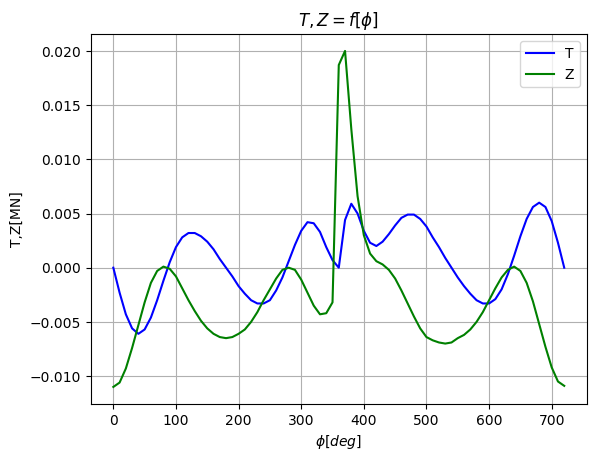

In [69]:
import matplotlib.pyplot as plt

# Data for the y-axis (first column)
y1 = [0.0000,-0.0023, -0.0043, -0.0056, -0.0061, -0.0057, -0.0046, -0.0030, -0.0012, 0.0005, 0.0019, 0.0028,
      0.0032, 0.0032, 0.0029, 0.0024, 0.0017, 0.0008, 0.0000, -0.0008, -0.0017, -0.0024, -0.0030, -0.0033,
      -0.0033, -0.0030, -0.0021, -0.0009, 0.0006, 0.0021, 0.0034, 0.0042, 0.0041, 0.0033, 0.0019, 0.0007,
      -0.0000, 0.0044, 0.0059, 0.0050, 0.0034, 0.0023, 0.0020, 0.0024, 0.0031, 0.0039, 0.0046,
      0.0049, 0.0049, 0.0045, 0.0038, 0.0028, 0.0019, 0.0009, -0.0000, -0.0009, -0.0017, -0.0024, -0.0030,
      -0.0033, -0.0033, -0.0029, -0.0020, -0.0006, 0.0011, 0.0029, 0.0045, 0.0056, 0.0060, 0.0056, 0.0043,
      0.0023, 0.0000]

# Data for the y-axis (second column)
y2 = [-0.0110, -0.0106, -0.0093, -0.0074, -0.0053, -0.0032, -0.0014, -0.0003, 0.0001, -0.0001, -0.0008, -0.0019,
      -0.0030, -0.0040, -0.0049, -0.0056, -0.0061, -0.0064, -0.0065, -0.0064, -0.0061, -0.0057, -0.0050, -0.0041, -0.0030,
      -0.0020, -0.0010, -0.0002, 0.0000, -0.0002, -0.0011, -0.0023, -0.0035, -0.0043, -0.0042, -0.0032, 0.0187, 0.0200, 0.0128,
      0.0066, 0.0030, 0.0013, 0.0006, 0.0003, -0.0002, -0.0010, -0.0021, -0.0033, -0.0045, -0.0056, -0.0064, -0.0067, -0.0069,
      -0.0070, -0.0069, -0.0065, -0.0062, -0.0057, -0.0050, -0.0041,-0.0030, -0.0019, -0.0009, -0.0002, 0.0001, -0.0003, -0.0014,
      -0.0031, -0.0052, -0.0073, -0.0092, -0.0105, -0.0109]

      
# Data for the x-axis
phi_deg = [i*10 for i in range(len(y1))]
phi_deg = [i*10 for i in range(len(y2))]

# Create a figure
plt.figure(figsize=(8, 6))

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the data

ax.plot(phi_deg, y1, color='blue', label='T')
ax.plot(phi_deg, y2, color='green', label='Z')
plt.grid(True)

# Add labels and title
plt.xlabel('$\phi [deg]$')
plt.ylabel('T,Z[MN]')
plt.title('$T,Z =f[\phi]$')
ax.legend()

# Display the plot
plt.show()









<Figure size 800x600 with 0 Axes>

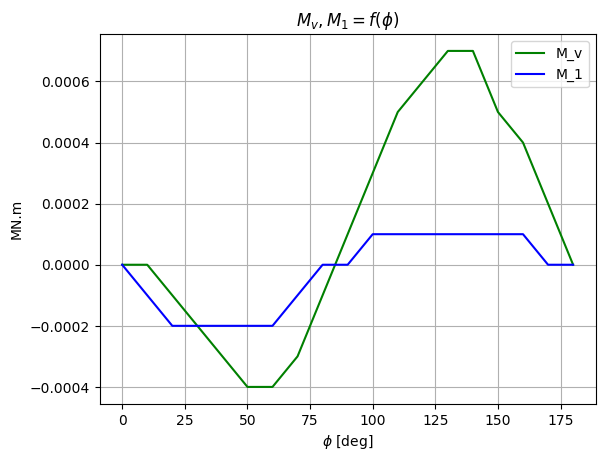

In [74]:
import matplotlib.pyplot as plt

# Data for the y-axis (first column)
y1 = [0.0000, 0.0000, -0.0001, -0.0002, -0.0003, -0.0004, -0.0004, -0.0003, -0.0001, 0.0001, 0.0003, 0.0005,
      0.0006, 0.0007, 0.0007, 0.0005, 0.0004, 0.0002, 0.0000]

# Data for the y-axis (second column)
y2 = [0.0000, -0.0001, -0.0002, -0.0002, -0.0002, -0.0002, -0.0002, -0.0001, -0.0000, 0.0000, 0.0001, 0.0001,
      0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0000, 0.0000, -0.0000, -0.0001, -0.0001, -0.0001, -0.0001,
      -0.0001, -0.0001, -0.0001, -0.0000, 0.0000, 0.0001, 0.0001, 0.0002, 0.0002, 0.0001, 0.0001, 0.0000,
      -0.0000, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0002, 0.0002,
      0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0000, 0.0000, -0.0000, -0.0001, -0.0001, -0.0001, -0.0001,
      -0.0001, -0.0001, -0.0001, -0.0000, 0.0000, 0.0001, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001,
      0.0000]

# Data for the x-axis
phi_deg = [i * 10 for i in range(len(y1))]

# Create a figure
plt.figure(figsize=(8, 6))

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the data
ax.plot(phi_deg, y1, color='green', label='M_v')
ax.plot(phi_deg, y2[:len(phi_deg)], color='blue', label='M_1')
plt.grid(True)

# Add labels and title
plt.xlabel('$\phi$ [deg]')
plt.ylabel('MN.m')
plt.title('$M_v, M_1 = f(\phi)$')
ax.legend()

# Display the plot
plt.show()


<Figure size 800x600 with 0 Axes>

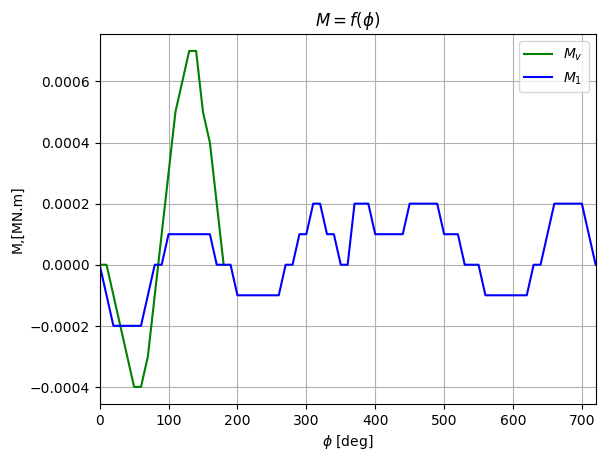

In [80]:
import matplotlib.pyplot as plt

# Data for the y-axis (first column)
y1 = [0.0000, 0.0000, -0.0001, -0.0002, -0.0003, -0.0004, -0.0004, -0.0003, -0.0001, 0.0001, 0.0003, 0.0005,
      0.0006, 0.0007, 0.0007, 0.0005, 0.0004, 0.0002, 0.0000]

# Data for the y-axis (second column)
y2 = [0.0000, -0.0001, -0.0002, -0.0002, -0.0002, -0.0002, -0.0002, -0.0001, -0.0000, 0.0000, 0.0001, 0.0001,
      0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0000, 0.0000, -0.0000, -0.0001, -0.0001, -0.0001, -0.0001,
      -0.0001, -0.0001, -0.0001, -0.0000, 0.0000, 0.0001, 0.0001, 0.0002, 0.0002, 0.0001, 0.0001, 0.0000,
      -0.0000, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0002, 0.0002,
      0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0000, 0.0000, -0.0000, -0.0001, -0.0001, -0.0001, -0.0001,
      -0.0001, -0.0001, -0.0001, -0.0000, 0.0000, 0.0001, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001,
      0.0000]

# Data for the x-axis
phi_deg1 = [i * 10 for i in range(len(y1))]
phi_deg2 = [i * 10 for i in range(len(y2))]

# Create a figure
plt.figure(figsize=(8, 6))

# Create the figure and axis objects
fig, ax = plt.subplots()

# Set x-axis limits
ax.set_xlim(0, 720)

# Plot the data
ax.plot(phi_deg1, y1, color='green', label='$M_v$')
ax.plot(phi_deg2, y2, color='blue', label='$M_1$')
plt.grid(True)

# Add labels and title
plt.xlabel('$\phi$ [deg]')
plt.ylabel('M,[MN.m]')
plt.title('$M=f(\phi)$')

# Show the legend
plt.legend()

# Display the plot
plt.show()


# Strength calculations of piston group

The piston is the most responsible part of the engine.which operates under very harsh conditions-high gas, inertial and thermal loads.The severe operating conditions lead to increased demands on the material from which they are made.

#### Selection of basic piston dimensions.

- Piston height H=60mm
- Piston diameter D=80mm
- Distance from face to piston bolt axis h1=32mm
- Height of leading part

$$ h_{leadingpart}=48mm $$

- Size

$$ b_{leadingpart}=28mm $$

- Guide part wall thickness

$$\delta_{leadingpart} =7mm $$

- Distance from face to first groove e=4mm
- Wall thickness between channels hn=2mm
- Number of oil holes $$ n_{M}=8 $$
- Diameter of oil holes $$ d_{bolt}=1mm$$
- Piston bolt hole diameter db=17mm
- Piston mass is $$ M_{piston} =0.420kg $$

#### Selection of the basic dimensions of the piston bolt.

- Bolt outer diameter $$ d_{piston}=17mm $$
- Bolt internal diameter $$ d_{insideDiameter}=9mm $$
- Bolt length l=70mm
- The mass of the piston bolt is $$ M_{pistonbolt}=0.100kg $$

# Piston

- Material AK4-1 aluminium alloy with crystal Structure $$M_{g0.015}C_{u0.025}F_{e0.01}Ni_{0.01}Al_{0.94}$$ 

- Bending stress

$$ \sigma_{\text{bending}} = \frac{M_{\text{bending}}}{W_{\text{bending}}} = P_{z,\text{max}} * \left(\frac{r_i}{\delta}\right) = 105.6 \, \text{MPa} \leq 150 \text{MPa}$$


$r_i$ - 0.66 m - inside forehead radius 

$\delta$ = 0.006m - piston face thickness

- Compressive presure in section x-x (through oil holes)

$$ \sigma_{presure} =\frac{P_{z,max}}{F_{x-x}} = 4.664 MPa \leq [150MPa] $$

where :  $P_{z,max} = p_{z,max}*F_{\delta} = 0.04516 MN $ maximum gas force on the forhead. 

$$ F_{x-x} =\frac{\pi}{2}\left(d^{2}_{k} - d^{2}_{i}\right) - n_{m}F^{`} = 0.00968218 m^{2} $$

$$F^{`}=\frac{d_{k}-d_{i}}{2}*d_{m} = 9*10^{-6}m^{2} $$

$$d_k = D-2\left(t+ \Delta t\right) = 0.0845m$$

- Pressure of tensile in section x-x is : 

$$\sigma_{pressure} =\frac {P_j}{f_{x-x}} = 1.112 MPa $$

where $ P_{j} = 10^{-6}*m_{x-x}*R*\omega^{2}_{nx,max}*\left(1+\lambda\right) = 0.004432MN $

is the inertial force from the reciprocating motion of the mass from the piston in the x-x section, determined at maximum engine speed p.x.

$m_{x-x}=0.4*m_{piston} = 0.232g$

- The leading part of the piston with height h is checked for maximum specific pressure according to the formula:

$q_{main} =\frac{N_{max}}{h_{main}*D} = 0.4558 MPa allowable limit 0.25-0.5 $

- Inspection of shear and flexure of the partition wall between the channels of Rings I and II:

The bending stress is :

$\sigma_{bending} = 0.0045*p_{z,max}*\left(\frac{D}{h_{n}}\right)^2 = 16.2 MPa$

The shear stress is:

$\tau_{shear}= 0.0314*p_{z,max}*\left(\frac{D}{h_{n}}\right) = 4.8MPa$

The sum stress of the 3rd strength theory would be:

$\sigma_{Sigma} =\sqrt{\sigma^{2}_{bending}+4\tau^{2}_{shear}} = 18.8 MPa \leq [30MPa] $

The diameter of the piston sealing part

$D_{sealing} = \frac{{\left[1+\alpha_{\text{cylinder}}(T_{\text{cylinder}}-T_{0\text{beginning cylinder TEMP}})-\Delta^{`}_{\text{sealing clearance}}\right]}}{{1+\alpha_{\text{piston}}(T_{\text{sealing}}-T_{0\text{beginning cylinder TEMP}})}} = 0.0935 \, \text{m}$


The diameter of the piston leading part

$D_{lead} = \frac{{\left[1+\alpha_{\text{cylinder}}(T_{\text{sealing}}-T_{0\text{beginning cylinder TEMP}})-\Delta^{`}_{\text{lead clearance}}\right]}}{{1+\alpha_{\text{piston}}(T_{\text{lead}}-T_{0\text{beginning cylinder TEMP}})}} = 0.0939 \, \text{m}$


where
- $\alpha_{cylinder} =\alpha_{piston} =0.000025 K^{-1}$ - linear expansion coefficients of materials

- $T_{cylinder} = 385K$ - cylinder temperature

- $T_{sealing} =470K$ - temperature of the sealing part

- $T_{lead} =460K$ - leading part temperature

- $T_{0} =288K$ - initial cylinder and piston temperature

- $\Delta^{`}_{sealingclearence} =0.000235m $- looseness of the sealing part in the hot state

- $\Delta^{`}_{leadclearence}=0.000094m$ = lead clearance in hot condition

The diametrical clearance of the sealing part:


$ \Delta_{sealingclearence} = D - D_{sealing} = 0.000043278m$


The diametrical clearance of the leading part:

$\Delta_{leadclearence} = D - D_{lead} = 0.00000702m$

# Piston bolt

The piston bolt is subjected to a load varying in magnitude and direction, which causes surface compression stress, bending, shearing and ovalization.

- The material is 18XHMA

The piston bolt is calculated at the specific pressure in the upper connecting rod head $q_{rodhead}$ , and the piston bores $q_{pistonbores}$ :

$ q_{\text{rodhead}} = \frac{P_{z} - P_{j,\text{pistongroup}}}{d_{\text{piston}} \cdot l_{\text{rod}}} = 59.6 \, \text{MPa} \leq 60 \, \text{MPa}$


$q_{piston} =\frac {P_{z} - KP_{j,pistongroup}}{d_{piston}*(l-b)} = 33.8 MPa \leq[50MPa]$

$P_{j}-10^{-6}*m_{x-x}*R*\omega^{2}_{nx,max}*(1+\lambda)= 0.004432MN$ - the inertial force of the piston group

$K = 0.78$ - coefficient considering the mass of the piston bolt

- Bending stress

$\sigma_{bending} =\frac {M_{bending}}{W_{bending}} =\frac {P*(1+2b-1.5l_{M})}{1.2d^{3}_{piston}(1-\alpha^{4})} = 191.05 MPA \leq[250MPa]$

- Shear stress

$ \tau_{shear} =\frac{0.85*P*(1+\alpha+\alpha^{2}}{d^{2}_{piston}*(1-\alpha^{4})}=237.5Mpa\leq [250MPa]$

Maximum ovalization or increase of the diameter of the piston bolt in a plane perpendicular to the load plane is obtained in the middle part of the bolt and is determined by the formula:

$\Delta d_{pistonmax}=\frac{0.09*P}{l*E}*\left(\frac{1+\alpha}{1-\alpha}\right)^{3}*K_{1}=4.2*10^{-5} mm \leq[0.02mm]$

where $K_{1} = 1.5 - 15(\alpha - 0.04)^{2} = 1.14354 $ - correction factor.

From the ovalization of the cross section in the bolt, bending stresses are generated which are maximum in the middle section of the bolt:

- Point 1

$\sigma_{\alpha\phi=0} =\frac {P_{z}}{l*d_{piston}}*\left[\frac{0.19*(2+\alpha)*(1+\alpha)}{(1-\alpha)^{2}}-\frac{1}{(1-\alpha)}\right]*K_{1}=117.7 MPA\leq[300MPa] $

- Point 2

$\sigma_{l\phi=0} =\frac {P_{z}}{l*d_{piston}}*\left[\frac{0.19*(2+\alpha)*(1+\alpha)}{(1-\alpha)^{2}*\alpha}+\frac{1}{(1-\alpha)}\right]*K_{1}=274.6 MPA\leq[300MPa] $

- Point 3

$\sigma_{\alpha\phi=90} =\frac {P_{z}}{l*d_{piston}}*\left[\frac{0.174*(2+\alpha)*(1+\alpha)}{(1-\alpha)^{2}}-\frac{0.636}{(1-\alpha)}\right]*K_{1}=211.7 MPA\leq[300MPa] $

- Point 4

$\sigma_{\alpha\phi=90} =\frac {P_{z}}{l*d_{piston}}*\left[\frac{0.174*(2+\alpha)*(1+\alpha)}{(1-\alpha)^{2}*\alpha}-\frac{0.636}{(1-\alpha)}\right]*K_{1}=174.8 MPA\leq[300MPa] $

- Hot working clearance of piston-bolt-piston and piston-bolt-button couplings

$L^{`} = 0.001*d_{piston} = 0.000032m$

$\Delta_{connectinRod}=0.01 / 0.03mm$

# Piston rings

Piston rings ensure the tightness of the piston space.They operate under high temperature and variable loads.

- Material :  Nowadays, ductile iron and stainless steel are used as materials. As modern engines have become smaller and therefore more powerful, the load on them has increased manifold, there is a need to use innovative materials. The leader among materials is molybdenum, which features antifriction properties and increased service life. By the way, piston skirts are processed with a similar composition.

- Strength check:

1) Determine the average radial ring pressure on the cylinder walls:

$P_{average}= 0.152*E*\frac{A_{0}/t}{(D/t-1)^{3}*D/t}=0.17 MPA \leq0.37MPa$

$t=0.04*D=0.04*0.096\approx 0.004mm$ - radial ring thickness

$A_{0} = 2.5*t = 2.5*0.004 =0.01mm$ - difference between the clearances in the slot

$E=1.2*10^{5}$- modulus of linear deformation for cast iron

2) Determination of bending stresses in the working condition:

$\sigma_{bending,workingcond} = 2.61*p_{average}*\left(\frac{D}{t}-1\right)^{2} = 225.1 MPa\leq[450]MPa$

and when placing the ring on the piston:

$\sigma_{b,p}=\frac{4*E*\left(1-0.114*\frac{A_{0}}{t}\right)}{m*\left(\frac{D}{t}-1.4\right)^{2}*\frac{D}{t}} = 447.4 MPa\leq[450]MPa$

where m=1,57 coefficient depending on how the ring is placed on the piston.

The minimum working clearance in the piston ring key in hot condition shall be $\Delta^{`}=0.06/0.1mm$, and the mounting clearance is determined by the formula:

$\Delta=\Delta^{`}*\pi*D*\left[\alpha_{ring}*\left(T_{ring}*T_{0}\right)-\alpha_{cylinder}*\left(T_{cylinder} - T_{0}\right)\right] = 0.08mm$

where : $\alpha_{ring}$ - coefficient of linear expansion of the ring material

$ \alpha_{cylinder}$ -coefficient of linear expansion of the cylinder material

$T_{ring} $ - temperature of the ring

$T_{cylinder} $- temperature of the cylinder 

$T_{0}$- installation temperature

At different points on the circle, the piston ring creates different pressures $p_{\phi}$ on the cylinder:

$ p_{\phi} = \mu_{ring}*p_{average} $

where $\mu_{average}$ is the coefficient depending on the angle $\phi$ of a point on the circle

<style>
  table {
    width: 100%;
  }
  th, td {
    padding: 8px;
    text-align: left;
  }
</style>

<table>
  <tr>
    <th style="width: 30%;">$\phi_{0}$</th>
    <th style="width: 30%;">$\mu_{average}$</th>
    <th style="width: 50%;">$p_{\phi}$</th>
  </tr>
  <tr>
    <td>0</td>
    <td>1,05</td>
    <td>0,178870502</td>
  </tr>
  <tr>
    <td>30</td>
    <td>1,05</td>
    <td>0,178870502</td>
  </tr>
  <tr>
    <td>60</td>
    <td>1,114</td>
    <td>0,189773085</td>
  </tr>
  <tr>
    <td>90</td>
    <td>0,9</td>
    <td>0,153317573</td>
  </tr>
  <tr>
    <td>120</td>
    <td>0,45</td>
    <td>0,076658786</td>
  </tr>
  <tr>
    <td>150</td>
    <td>0,67</td>
    <td>0,114136415</td>
  </tr>
  <tr>
    <td>180</td>
    <td>2,85</td>
    <td>0,485505647</td>
  </tr>
</table>


The nature of the pressure variation $p_{\phi}$ is shown in the figure:

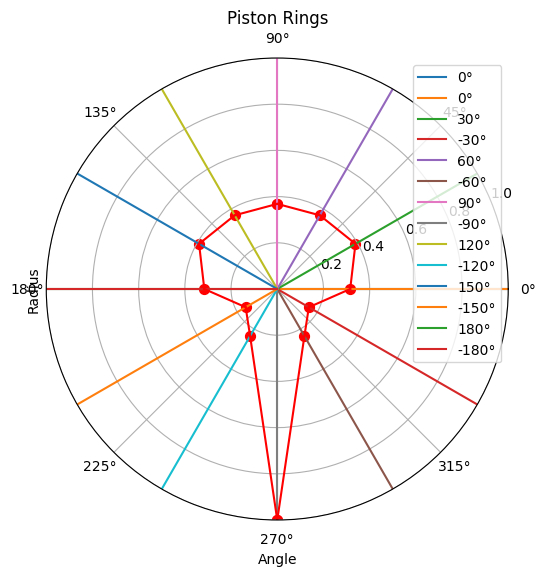

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the angles
angles = [0, 30, 60, 90, 120, 150, 180]

# Data for mu_average values
mu_average = [1.05, 1.05, 1.114, 0.9, 0.45, 0.67, 2.85]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'})

# Rotate the angles
rotated_angles = [(angle + 90) % 360 for angle in angles]

# Plot the angles
for angle in angles:
    radian = np.radians(angle)
    ax.plot([0, radian], [0, 1], label=f'{angle}°')
    ax.plot([0, -radian], [0, 1], label=f'{-angle}°')

# Add the points on the circle with mu_average values
for angle, mu in zip(angles, mu_average):
    radian = np.radians((angle + 90) % 360)  # Rotate the angle
    radius = mu / max(mu_average)  # Normalize the radius based on maximum mu_average value
    ax.scatter(radian, radius, s=50, color='red')

    # Add the mirrored points
    mirrored_radian = np.radians((-angle + 90) % 360)  # Rotate the angle
    ax.scatter(mirrored_radian, radius, s=50, color='red')

# Connect the points on the circle
for i in range(len(angles) - 1):
    ax.plot([np.radians((angles[i] + 90) % 360), np.radians((angles[i+1] + 90) % 360)],
            [mu_average[i]/max(mu_average), mu_average[i+1]/max(mu_average)],
            color='red')

# Connect the mirrored points
for i in range(len(angles) - 1):
    ax.plot([np.radians((-angles[i] + 90) % 360), np.radians((-angles[i+1] + 90) % 360)],
            [mu_average[i]/max(mu_average), mu_average[i+1]/max(mu_average)],
            color='red')

# Set the radius limit
ax.set_rlim(0, 1)

# Set the labels and title
ax.set_xlabel('Angle')
ax.set_ylabel('Radius')
ax.set_title('Piston Rings')

# Add a legend
ax.legend()

# Display the plot
plt.show()


# Simple Simulation of an engine

In [ ]:
from IPython.display import Image

image_path_1 = 'Photos/1'
image_path_2 = 'Photos/2'

image_1 = Image(filename=image_path_1)
image_2 = Image(filename=image_path_2)

display(image_1)
display(image_2)


The main idea of the project is as follows (see the image above).

We press a gas pedal, and it outputs some electrical current to the Gas Pump
The Gas Pump is connected to a Gas Tank, inputs some portion of gas, and outputs it to the Engine
The Engine should rotate

#### Gasoline and GasPortion

In [42]:
import dataclasses
from abc import ABC
from dataclasses import dataclass


@dataclass
class Gasoline(ABC):
    octane: float


class UnwantedGasolineMix(ValueError):
    pass


@dataclass
class GasPortion:
    gasoline: Gasoline
    volume_liters: float

    def __add__(self, other:"GasPortion") -> "GasPortion":
        if type(self.gasoline).__name__ != type(other.gasoline).__name__:
            raise UnwantedGasolineMix
        volume_liters = self.volume_liters + other.volume_liters
        octane = self.gasoline.octane * (self.volume_liters / volume_liters)
        octane += other.gasoline.octane * (other.volume_liters / volume_liters)
        octane = round(octane, ndigits=2)
        return GasPortion(
            gasoline=dataclasses.replace(self.gasoline, octane=octane),
            volume_liters=volume_liters,
        )
    

You may notice an __add__ function here. This function is called every time you want to sum up two objects of type GasPortion. Here we check if the types of gasoline are the same, and then we can calculate the octane number based on the volume in liters.

#### Testing our Gasoline file 

In [ ]:
import pytest

# from gasoline.gasoline import (
    Gasoline,
    GasPortion,
    UnwantedGasolineMix,
)


class Benzine(Gasoline):
    pass


class Diesel(Gasoline):
    pass


class TestCreateBenzine:
    def test_create_benzine(self) -> None:
        benzine = Benzine(octane=95)
        diesel = Diesel(octane=70)
        assert isinstance(benzine, Gasoline)
        assert isinstance(benzine, Benzine)
        assert isinstance(diesel, Gasoline)
        assert isinstance(diesel, Diesel)

    def test_create_a_portion(self) -> None:
        benzine95 = Benzine(octane=95)
        benzine98 = Benzine(octane=98)
        portion1 = GasPortion(
            gasoline=benzine95,
            volume_liters=2.5,
        )
        assert isinstance(portion1, GasPortion)
        portion2 = GasPortion(
            gasoline=benzine98,
            volume_liters=3.5,
        )
        assert isinstance(portion1, GasPortion)
        mixed = portion1 + portion2
        assert mixed.gasoline.octane == 96.75
        diesel = GasPortion(
            gasoline=Diesel(octane=70),
            volume_liters=100,
        )
        with pytest.raises(UnwantedGasolineMix):
            portion1 + diesel
        with pytest.raises(UnwantedGasolineMix):
            diesel + portion1

#### The Engine

In [45]:
# from gasoline.gasoline import GasPortion, Gasoline


class Engine:
    def __init__(
            self,
            gasoline: Gasoline,
            max_flow_speed_lps: float = 0.2,
            max_rpm: float = 5000,
    ):
        self.max_flow_speed_lps = max_flow_speed_lps
        self.max_rpm = max_rpm
        self.gasoline = gasoline
        self.total_supplied_gas = GasPortion(
            gasoline=gasoline,
            volume_liters=0,
        )
        self.rotations: float = 0

    @classmethod
    def produce_a_standard_benzine_engine(cls):
        class Benzine(Gasoline):
            pass

        benzine95 = Benzine(octane=95)
        return cls(
            gasoline=benzine95,
        )

    @classmethod
    def produce_a_standard_diesel_engine(cls):
        class Diesel(Gasoline):
            pass

        diesel70 = Diesel(octane=95)
        return cls(
            gasoline=diesel70,
        )

    def supply(
            self,
            gas_portion: GasPortion,
            seconds: float,
    ):
        self.haha = 5
        if gas_portion.volume_liters <= 0 or seconds <= 0:
            return
        self.total_supplied_gas += gas_portion
        flow_speed = min(
            gas_portion.volume_liters / seconds,
            self.max_flow_speed_lps
        )
        flow_speed_relative = flow_speed / self.max_flow_speed_lps
        octane_relative = gas_portion.gasoline.octane / self.gasoline.octane
        rpm = self.max_rpm * flow_speed_relative * octane_relative
        # now convert rates per minute to rates per second
        rps = rpm / 60
        # and actually rotate the engine:
        rotations = round(rps * seconds, ndigits=2)
        self.rotations += rotations
        return rotations

#### Test class for Engine 

In [47]:
#from engine.engine import Engine
#from gasoline.gasoline import Gasoline, GasPortion


class Benzine(Gasoline):
    pass


class TestEngine:
    def test_engine(self) -> None:
        benzine100 = Benzine(octane=100)
        engine = Engine(
            gasoline=benzine100,
            max_rpm=1000*60,
            max_flow_speed_lps=1,
        )
        # test full speed
        engine.supply(
            gas_portion=GasPortion(
                gasoline=benzine100,
                volume_liters=1,
            ),
            seconds=1,
        )
        assert engine.rotations == 1000

    def test_standard_engine(self) -> None:
        benzine95 = Benzine(octane=95)
        engine = Engine.produce_a_standard_benzine_engine()
        assert isinstance(engine, Engine)
        rotations = engine.supply(
            gas_portion=GasPortion(
                gasoline=benzine95,
                volume_liters=1,
            ),
            seconds=5,
        )
        assert rotations == 416.67

        # more liters for the same time should not change anything:
        rotations = engine.supply(
            gas_portion=GasPortion(
                gasoline=benzine95,
                volume_liters=2,
            ),
            seconds=5,
        )
        assert rotations == 416.67

        # but in a longer period, more rotations:
        rotations = engine.supply(
            gas_portion=GasPortion(
                gasoline=benzine95,
                volume_liters=2,
            ),
            seconds=60,
        )
        assert rotations == 833.33

#### Gas Pump

In [48]:
import dataclasses
from dataclasses import dataclass
from typing import Optional

#from engine.engine import Engine
#from gasoline.gasoline import GasPortion


class NegativeVoltage(ValueError):
    pass


class TooHighVoltage(ValueError):
    pass


@dataclass
class GasPump:
    connected_gas_tank: GasPortion
    connected_engine: Optional[Engine]
    max_flow_lps: float  # liters per second

    def apply(
            self,
            voltage: float,
            seconds: float,
    ) -> GasPortion:
        if voltage < 0:
            raise NegativeVoltage
        if voltage > 14:
            raise TooHighVoltage
        flow_lps = self.max_flow_lps * voltage / 12
        volume = round(min(
            self.connected_gas_tank.volume_liters,
            flow_lps * seconds
        ), ndigits=2)
        self.connected_gas_tank.volume_liters -= volume
        gas_portion = dataclasses.replace(
                self.connected_gas_tank,
                volume_liters=volume
            )
        if self.connected_engine is not None:
            self.connected_engine.supply(
                gas_portion=gas_portion,
                seconds=seconds,
            )
        return gas_portion

#### Test class for gas pump

In [49]:
#from gasoline.gasoline import GasPortion, Gasoline
#from gaspump.gaspump import GasPump


class Benzine(Gasoline):
    pass


class TestGasPump:
    def test_gas_pump(self) -> None:
        gas_tank = GasPortion(
            gasoline=Benzine(
                octane=95,
            ),
            volume_liters=10,
        )
        gas_pump = GasPump(
            connected_gas_tank=gas_tank,
            connected_engine=None,
            max_flow_lps=0.2,
        )
        output_gas = gas_pump.apply(
            voltage=6,
            seconds=5,
        )
        # flow speed = 0.2, we apply it for 5 seconds, so it makes 1l.
        # voltage = 6 (of max 12), so we divide it by 2,
        # should be 0.5 in the end.
        assert output_gas.volume_liters == 0.5

#### Gas Pedal

In [52]:
from dataclasses import dataclass

#from gasoline.gasoline import GasPortion
#from gaspump.gaspump import GasPump


@dataclass
class Pedal:
    connected_gas_pump: GasPump

    def press(
            self,
            how_hard: float,
            seconds: float,
    ) -> GasPortion:
        if seconds < 0:
            raise ValueError("No negative time period allowed")
        how_hard = max(0, how_hard)
        how_hard = min(1, how_hard)
        return self.connected_gas_pump.apply(
            voltage=12*how_hard,
            seconds=seconds,
        )

#### Test case for Gas Pedal

In [53]:
#from gasoline.gasoline import GasPortion, Gasoline
#from gaspump.gaspump import GasPump
#from pedal.pedal import Pedal


class Benzine(Gasoline):
    pass


class TestPedal:
    def test_gas_pump(self) -> None:
        gas_tank = GasPortion(
            gasoline=Benzine(
                octane=95,
            ),
            volume_liters=10,
        )
        gas_pump = GasPump(
            connected_gas_tank=gas_tank,
            connected_engine=None,
            max_flow_lps=0.2,
        )
        pedal = Pedal(
            connected_gas_pump=gas_pump,
        )

        output_gas = pedal.press(
            how_hard=0.5,
            seconds=5,
        )

        assert output_gas.volume_liters == 0.5

        output_gas = pedal.press(
            how_hard=1,
            seconds=10,
        )

        assert output_gas.volume_liters == 2

#### Test the complete project

In [55]:
#from engine.engine import Engine
#from gasoline.gasoline import Gasoline, GasPortion
#from gaspump.gaspump import GasPump
#from pedal.pedal import Pedal


class TestEverythingTogether:
    def test_everything_ok(self) -> None:
        """
        Here is the scenario:
        1. Create a Benzine type of Gasoline
        2. Create two gas portions of 95 and 98 for a gas tank
        3. Create an engine that is supposed to work with Benzine 98
        4. Create a gas pump and connect the gas tank and the engine to it
        5. Create a pedal and connect to the pump
        6. Press a pedal and see that the rotations are increased
        :return:
        """

        # STEP 1. Create a Benzine type of Gasoline
        class Benzine(Gasoline):
            pass

        # STEP 2. Create two gas portions of 95 and 98 for a gas tank
        bezine95 = Benzine(octane=95)
        bezine98 = Benzine(octane=98)

        gas_tank = GasPortion(
            gasoline=bezine95,
            volume_liters=20,
        )
        gas_tank += GasPortion(
            gasoline=bezine98,
            volume_liters=20,
        )
        # so, we should get 40 liters of (95+98)/2 == 96.5?
        assert gas_tank.volume_liters == 40
        assert gas_tank.gasoline.octane == 96.5

        # STEP 3. Create an Engine that is supposed to work with Benzine 98
        engine = Engine(
            gasoline=bezine98,
        )

        # STEP 4. Create a gas pump and connect the gas tank and the engine to it
        gas_pump = GasPump(
            connected_engine=engine,
            connected_gas_tank=gas_tank,
            max_flow_lps=0.2,
        )

        # STEP 5. Create a pedal and connect to the pump
        pedal = Pedal(
            connected_gas_pump=gas_pump,
        )

        # STEP 6. Press a pedal and see that the rotations are increased
        pedal.press(
            how_hard=0.8,
            seconds=5,
        )

        # i cheated here: just run and see the result instead of calculating
        # never do this in real life :)
        assert engine.rotations == 328.23

        # Press again
        pedal.press(
            how_hard=0.8,
            seconds=5,
        )

        assert engine.rotations == 328.23*2

# References


###### Fundamentals of Automotive Technology: Principles and Practice - Kirk VanGelder

###### Automotive Engineering: An Introduction - Vincent Parese

###### Encyclopedia of Automotive Engineering - Encyclopedia of Automotive Engineering